In [170]:
#Authors:- Tanmay Sawaji(tsawaji) and Ruchik Dama(rdama)

In [171]:
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [172]:
train_ds = dsets.MNIST(root='MNIST_data/',train=True,transform=transforms.ToTensor(),download=True)
test = dsets.MNIST(root='MNIST_data/',train=False,transform=transforms.ToTensor(),download=True)
#Creating a validations set which is 10% of the Train Set
indices = np.arange(60000)
validate  = torch.utils.data.Subset(train_ds, indices[:6000])
train=torch.utils.data.Subset(train_ds, indices[6000:])

In [173]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validate, batch_size=batch_size, shuffle=True)
print('The training dataset:\t',train)
print('\nThe testing dataset:\t',test)
print('\nThe validate dataset:\t',validate)

The training dataset:	 <torch.utils.data.dataset.Subset object at 0x7f374843be90>

The testing dataset:	 Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()

The validate dataset:	 <torch.utils.data.dataset.Subset object at 0x7f3748435f10>


In [174]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


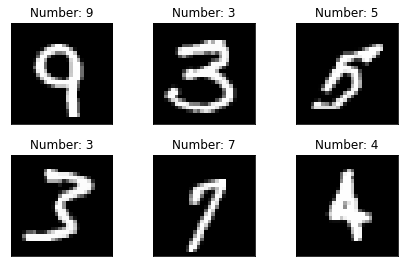

In [175]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i].numpy().squeeze(), cmap='gray', interpolation='none')
  plt.title("Number: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])

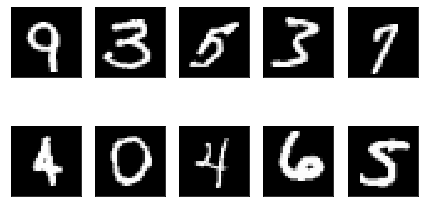

In [176]:
fig,ax=plt.subplots(2,5,True,True)
ax=ax.flatten()
for i in range(10):
  ax[i].imshow(images[i].numpy().squeeze(), cmap='gray', interpolation='none')

    
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [177]:
class CNN(torch.nn.Module,):
    def __init__(self,p=0.0):
            super(CNN, self).__init__()

            self.layer=torch.nn.Sequential(
            # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
            torch.nn.Conv2d(1, 12, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(12),
            #torch.nn.init.xavier_normal_(self.conv1.weight),
            #torch.nn.init.zeros_(self.torch.nn.Conv2d.bias),
            torch.nn.ReLU(inplace=True),
            #In First Layer the output would be (for first layer the we take in-channel as 28 beacause the images is 28x28 pixel)
            # so, [(28 + 2*1 - 3)/1] + 1 = 28.
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # as kernel_size in maxpool is 2 ,  we have to divide it by 2 28/2=14.
            #Second Layer
            torch.nn.Conv2d(12, 24, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(24),
            #torch.nn.init.xavier_normal_(self.torch.nn.Conv2d.weight),
            #torch.nn.init.zeros_(self.torch.nn.Conv2d.bias),
            # After the second convolutional layer the output of this layer is:
            # [(14 + 2*1 - 3)/1] + 1 = 14.
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
            # 14 / 2 = 7
            
            )
    
            
            # Linear layer
            self.linear_layers = torch.nn.Sequential(
                    # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formula 
                    # which is the output of each convolutional layer
                    torch.nn.Linear(in_features=24*7*7, out_features=64),          
                    torch.nn.ReLU(),
                    torch.nn.Linear(64, 10), 
                    #torch.nn.init.xavier_normal_(self.torch.nn.Linear.weight),
                    #torch.nn.init.zeros_(self.torch.nn.Linear.bias),
            )
    
    # Defining forward
    def forward(self, x):
        x = self.layer(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
#Glorot Initialization    
def initialize_weights(m):
      if isinstance(m, torch.nn.Conv2d):
          torch.nn.init.xavier_normal_(m.weight)
          if m.bias is not None:
             torch.nn.init.zeros_(m.bias) 
      elif isinstance(m, torch.nn.Linear):
          torch.nn.init.xavier_normal_(m.weight)
          torch.nn.init.zeros_(m.bias)


model1 = CNN()
model1.apply(initialize_weights)
model1 = CNN()
model1.apply(initialize_weights)
print(model1)
model2 = CNN()
model2.apply(initialize_weights)
model3 = CNN()
model3.apply(initialize_weights)

CNN(
  (layer): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)


CNN(
  (layer): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [178]:
learning_rate = 0.05
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer1 = torch.optim.RMSprop(params=model1.parameters(), lr=0.001)# For Learning rate 0.05, The accuracy for RMSprop for nearly 50%.
optimizer2 = torch.optim.Adam(params=model2.parameters(), lr=learning_rate)
optimizer3 = torch.optim.SGD(params=model3.parameters(), lr=learning_rate,momentum=0.9,nesterov=True)
scheduler1 = torch.optim.lr_scheduler.StepLR(optimizer1, step_size=10, gamma=0.1)
scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer2, step_size=10, gamma=0.1)
scheduler3 = torch.optim.lr_scheduler.StepLR(optimizer3, step_size=10, gamma=0.1)

Training Optimizer1 the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 25
Epoch=  1 , batch =  0 , cost =  2.8083081245422363 , accuracy =  0.1875
Epoch=  1 , batch =  625 , cost =  0.08711991459131241 , accuracy =  0.96875
Epoch=  1 , batch =  1250 , cost =  0.009401318617165089 , accuracy =  1.0
Validate Epoch=  1 , batch =  0 , cost =  0.0018200208432972431 , accuracy =  1.0
Epoch:  1  averaged cost =  0.1761447787284851  train accuracy =  0.9519216528436019


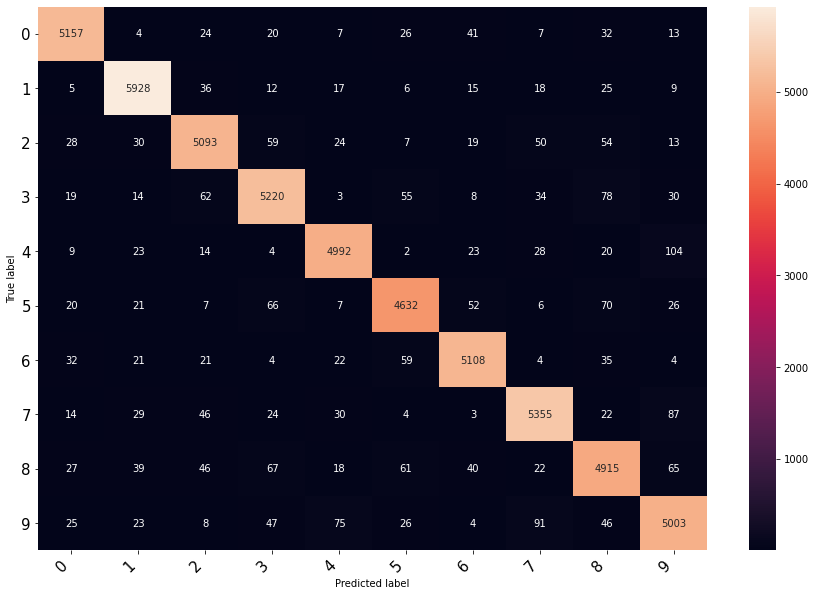

Epoch=  2 , batch =  0 , cost =  0.0046212091110646725 , accuracy =  1.0
Epoch=  2 , batch =  625 , cost =  0.02526746690273285 , accuracy =  1.0
Epoch=  2 , batch =  1250 , cost =  0.005783258471637964 , accuracy =  1.0
Validate Epoch=  2 , batch =  0 , cost =  0.020890427753329277 , accuracy =  1.0
Epoch:  2  averaged cost =  0.05821511521935463  train accuracy =  0.9668986966824644


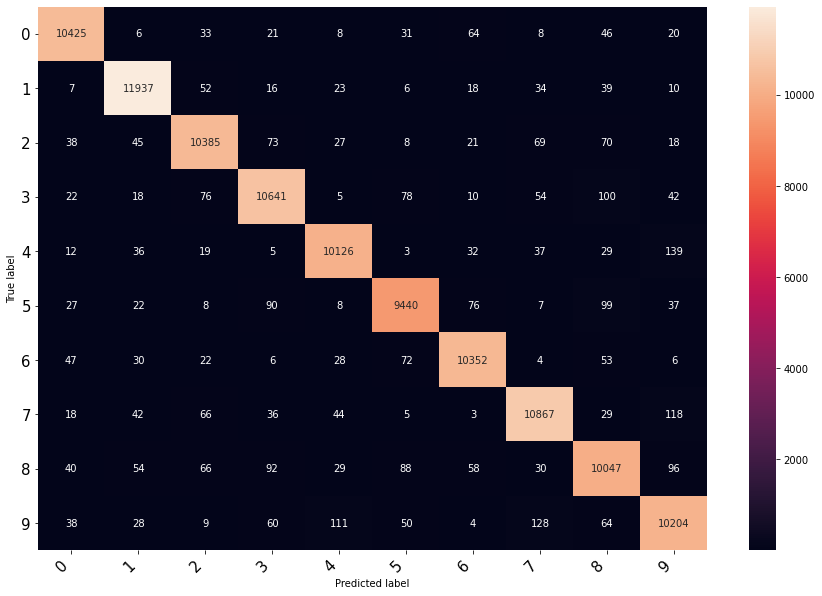

Epoch=  3 , batch =  0 , cost =  0.0015514740953221917 , accuracy =  1.0
Epoch=  3 , batch =  625 , cost =  0.00414096936583519 , accuracy =  1.0
Epoch=  3 , batch =  1250 , cost =  0.01231337245553732 , accuracy =  1.0
Validate Epoch=  3 , batch =  0 , cost =  0.0006208685226738453 , accuracy =  0.96875
Epoch:  3  averaged cost =  0.03989517316222191  train accuracy =  0.9739583333333334


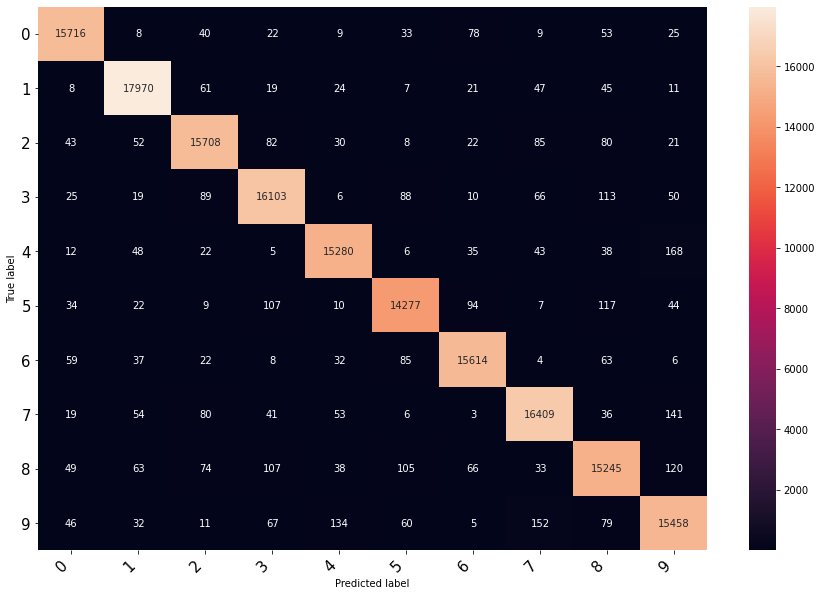

Epoch=  4 , batch =  0 , cost =  0.012045293115079403 , accuracy =  1.0
Epoch=  4 , batch =  625 , cost =  0.008575696498155594 , accuracy =  1.0
Epoch=  4 , batch =  1250 , cost =  0.10241192579269409 , accuracy =  0.96875
Validate Epoch=  4 , batch =  0 , cost =  0.0061700367368757725 , accuracy =  1.0
Epoch:  4  averaged cost =  0.03010704182088375  train accuracy =  0.9781222230450237


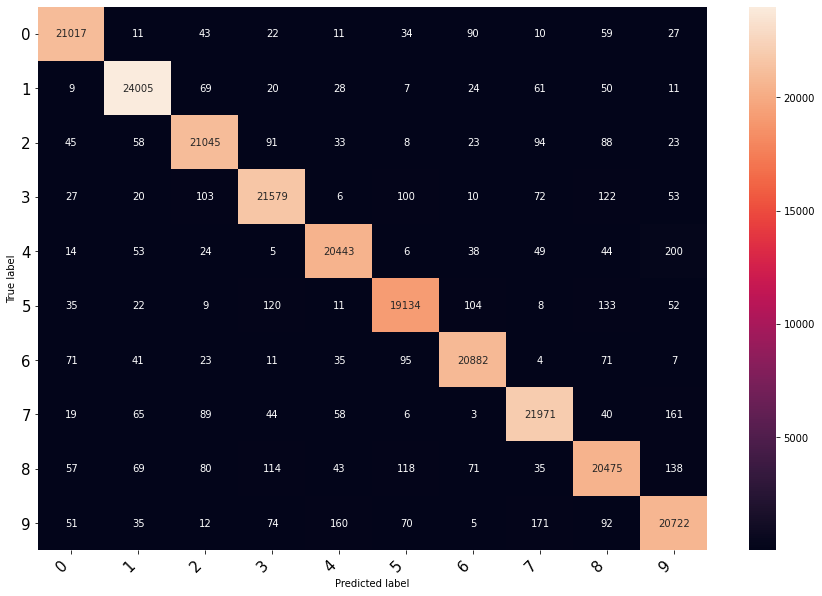

Epoch=  5 , batch =  0 , cost =  0.020784497261047363 , accuracy =  1.0
Epoch=  5 , batch =  625 , cost =  0.00011416470806580037 , accuracy =  1.0
Epoch=  5 , batch =  1250 , cost =  0.07681591808795929 , accuracy =  0.96875
Validate Epoch=  5 , batch =  0 , cost =  0.00040171496220864356 , accuracy =  1.0
Epoch:  5  averaged cost =  0.023064594715833664  train accuracy =  0.9810722748815166


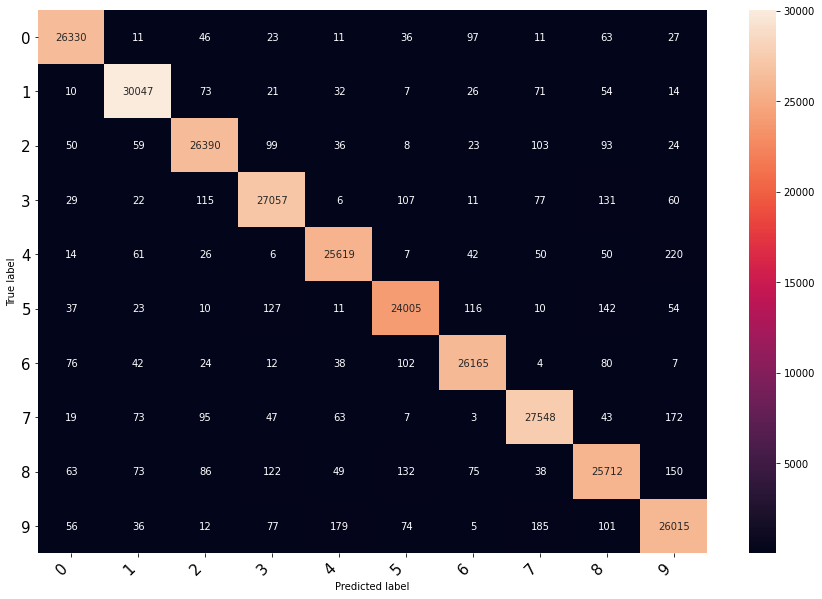

Epoch=  6 , batch =  0 , cost =  0.0010681693674996495 , accuracy =  1.0
Epoch=  6 , batch =  625 , cost =  0.0017303581116721034 , accuracy =  1.0
Epoch=  6 , batch =  1250 , cost =  0.008237696252763271 , accuracy =  1.0
Validate Epoch=  6 , batch =  0 , cost =  0.00018811624613590539 , accuracy =  1.0
Epoch:  6  averaged cost =  0.018621273338794708  train accuracy =  0.9832055934044234


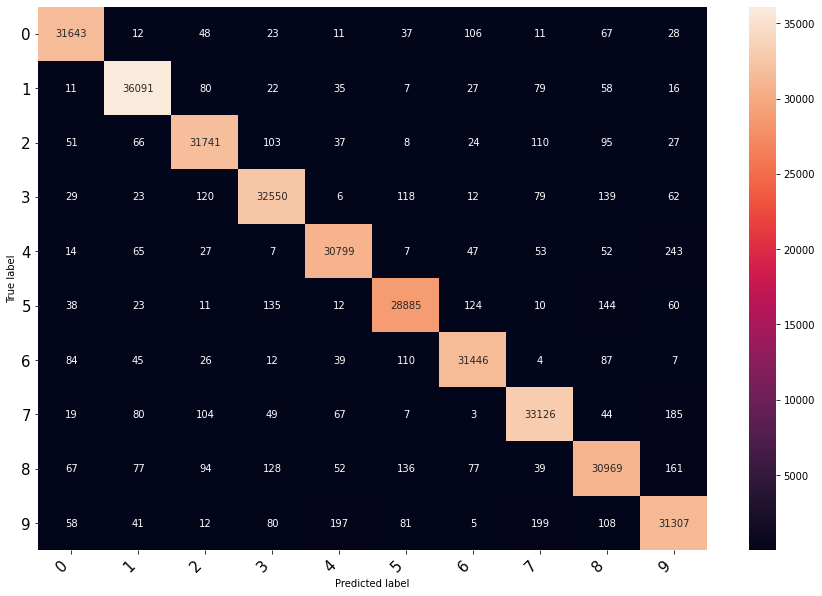

Epoch=  7 , batch =  0 , cost =  0.0008102947031147778 , accuracy =  1.0
Epoch=  7 , batch =  625 , cost =  0.0018743261462077498 , accuracy =  1.0
Epoch=  7 , batch =  1250 , cost =  0.0009259853977710009 , accuracy =  1.0
Validate Epoch=  7 , batch =  0 , cost =  0.052806586027145386 , accuracy =  1.0
Epoch:  7  averaged cost =  0.015492044389247894  train accuracy =  0.9848880754908599


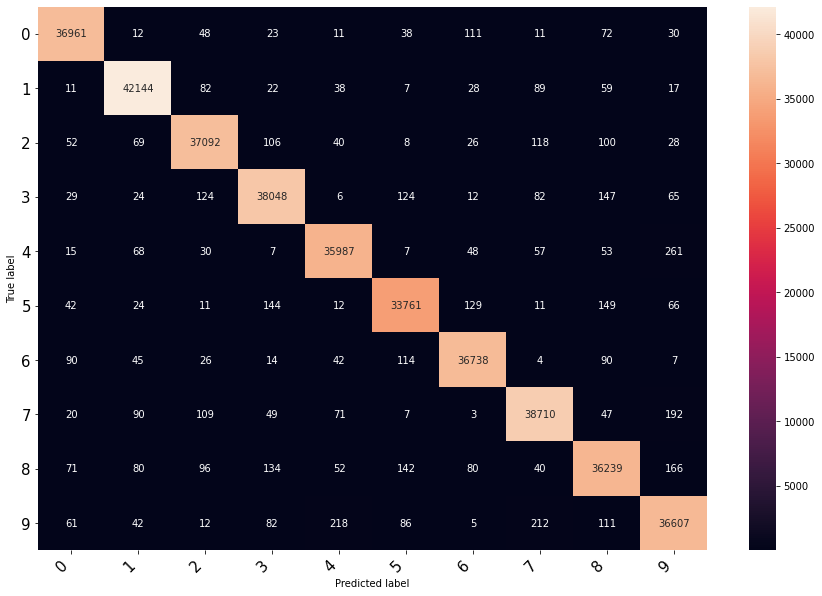

Epoch=  8 , batch =  0 , cost =  0.0003451171796768904 , accuracy =  1.0
Epoch=  8 , batch =  625 , cost =  0.004435565322637558 , accuracy =  1.0
Epoch=  8 , batch =  1250 , cost =  0.0007492299191653728 , accuracy =  1.0
Validate Epoch=  8 , batch =  0 , cost =  0.006176201160997152 , accuracy =  1.0
Epoch:  8  averaged cost =  0.01253905612975359  train accuracy =  0.9862864706753555


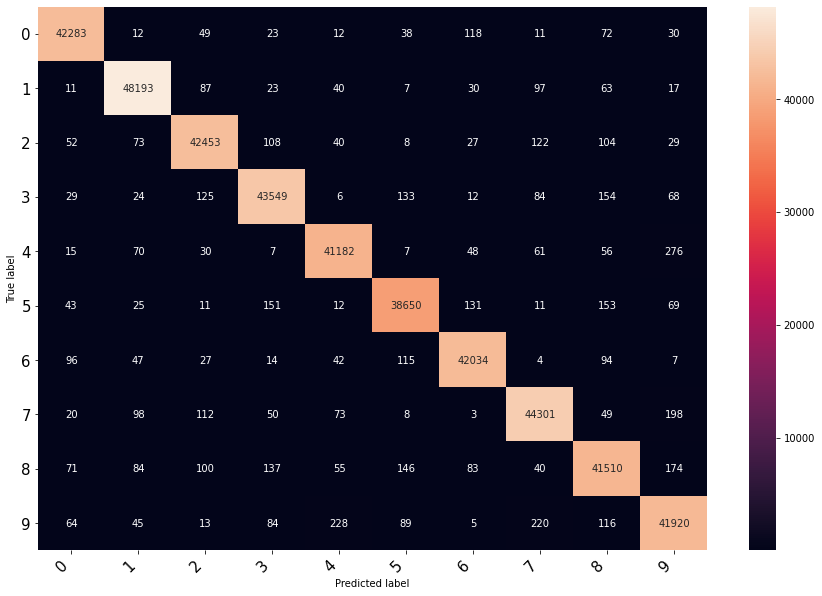

Epoch=  9 , batch =  0 , cost =  0.001955654239282012 , accuracy =  1.0
Epoch=  9 , batch =  625 , cost =  0.001719174673780799 , accuracy =  1.0
Epoch=  9 , batch =  1250 , cost =  7.852054295653943e-06 , accuracy =  1.0
Validate Epoch=  9 , batch =  0 , cost =  5.960446856079216e-07 , accuracy =  0.96875
Epoch:  9  averaged cost =  0.010556175373494625  train accuracy =  0.9874563915218536


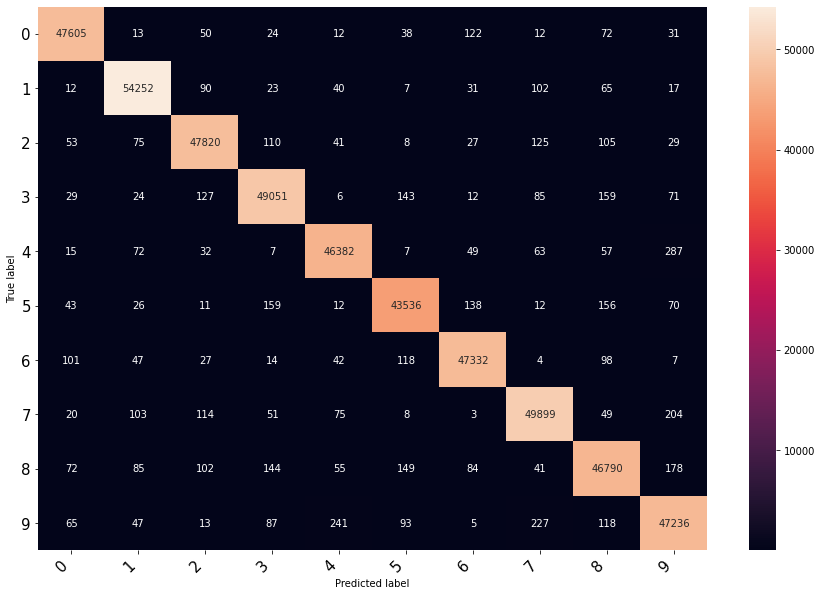

Epoch=  10 , batch =  0 , cost =  2.1606331301882165e-06 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.00014442743849940598 , accuracy =  1.0
Epoch=  10 , batch =  1250 , cost =  1.6614676496828906e-06 , accuracy =  1.0
Validate Epoch=  10 , batch =  0 , cost =  3.9488008951593656e-07 , accuracy =  1.0
Epoch:  10  averaged cost =  0.009888585656881332  train accuracy =  0.9883978821090047


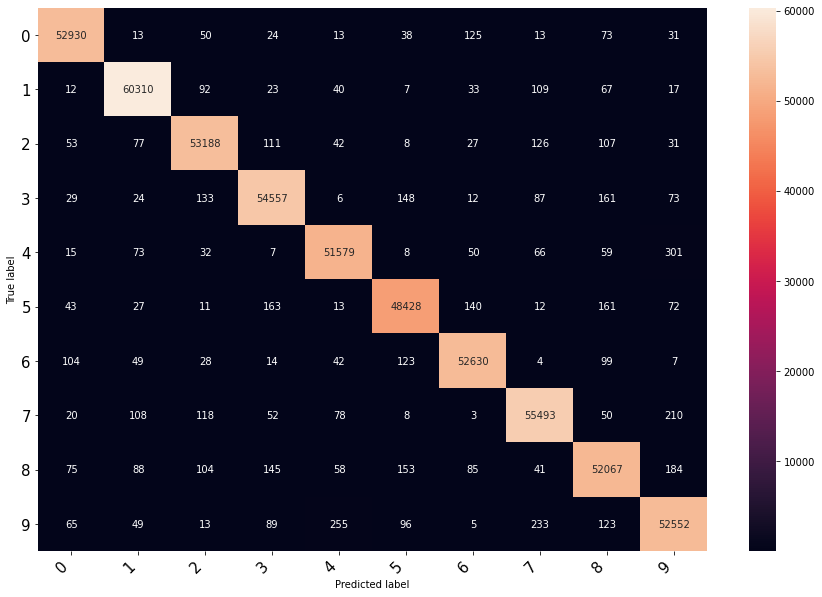

Epoch=  11 , batch =  0 , cost =  2.135485010512639e-05 , accuracy =  1.0
Epoch=  11 , batch =  625 , cost =  9.428593330085278e-05 , accuracy =  1.0
Epoch=  11 , batch =  1250 , cost =  5.5175791203510016e-05 , accuracy =  1.0
Validate Epoch=  11 , batch =  0 , cost =  0.00044496296322904527 , accuracy =  0.96875
Epoch:  11  averaged cost =  0.0026031360030174255  train accuracy =  0.9893852999784576


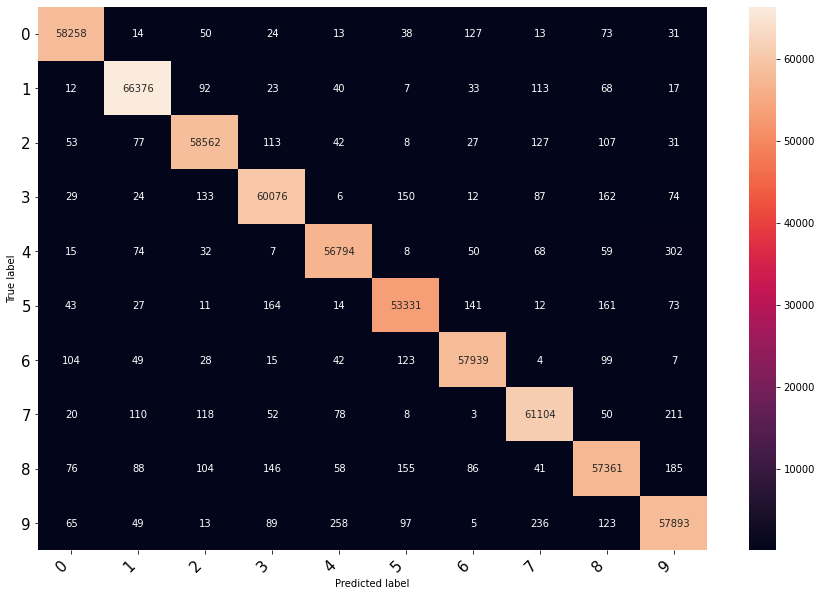

Epoch=  12 , batch =  0 , cost =  0.0002302495122421533 , accuracy =  1.0
Epoch=  12 , batch =  625 , cost =  8.08777185739018e-05 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  0.00015388711472041905 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  1.862643159711297e-07 , accuracy =  1.0
Epoch:  12  averaged cost =  0.0012791636399924755  train accuracy =  0.9902405460110585


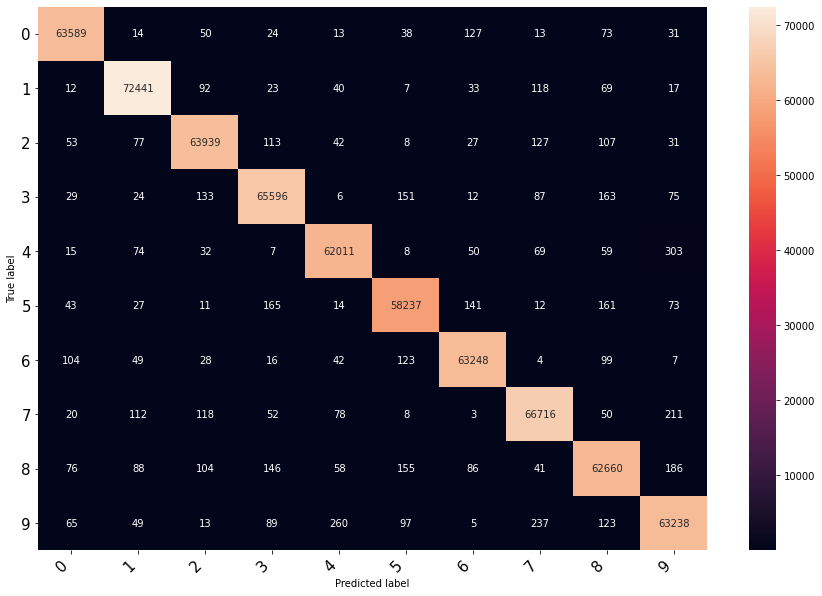

Epoch=  13 , batch =  0 , cost =  0.00019094080198556185 , accuracy =  1.0
Epoch=  13 , batch =  625 , cost =  1.8216557009509415e-06 , accuracy =  1.0
Epoch=  13 , batch =  1250 , cost =  0.00017049338202923536 , accuracy =  1.0
Validate Epoch=  13 , batch =  0 , cost =  2.957811830128776e-06 , accuracy =  0.96875
Epoch:  13  averaged cost =  0.0009361750562675297  train accuracy =  0.9909741842872767


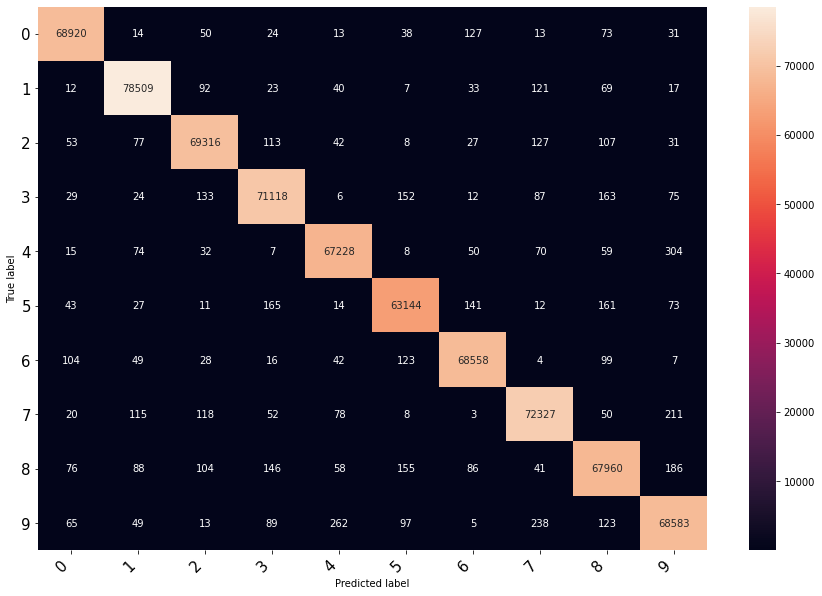

Epoch=  14 , batch =  0 , cost =  4.142346733715385e-05 , accuracy =  1.0
Epoch=  14 , batch =  625 , cost =  1.1175869119028903e-08 , accuracy =  1.0
Epoch=  14 , batch =  1250 , cost =  2.6077021431092362e-08 , accuracy =  1.0
Validate Epoch=  14 , batch =  0 , cost =  1.4677480066893622e-06 , accuracy =  0.96875
Epoch:  14  averaged cost =  0.0006277139182202518  train accuracy =  0.9916083065335138


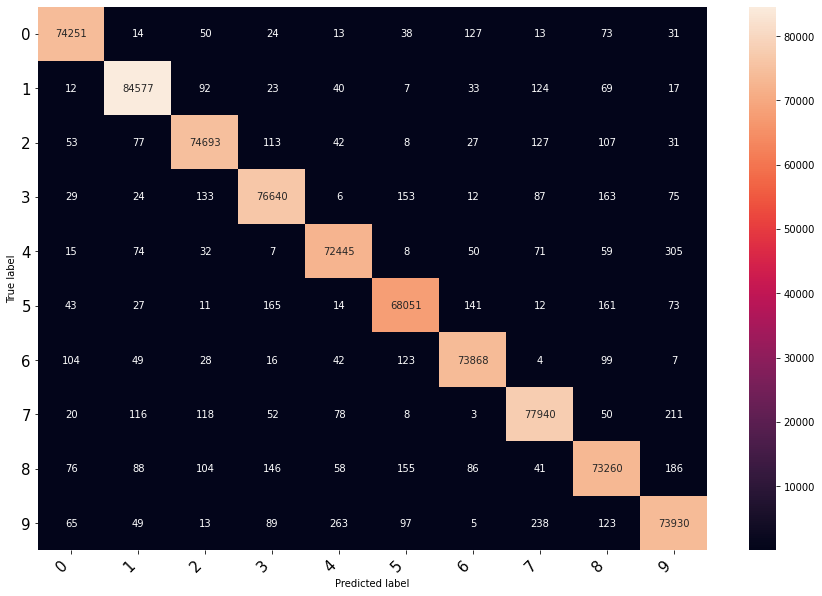

Epoch=  15 , batch =  0 , cost =  2.942973651443026e-07 , accuracy =  1.0
Epoch=  15 , batch =  625 , cost =  0.00010523566015763208 , accuracy =  1.0
Epoch=  15 , batch =  1250 , cost =  2.006491195061244e-05 , accuracy =  1.0
Validate Epoch=  15 , batch =  0 , cost =  0.00021394234499894083 , accuracy =  0.96875
Epoch:  15  averaged cost =  0.0005101084825582802  train accuracy =  0.9921603475513429


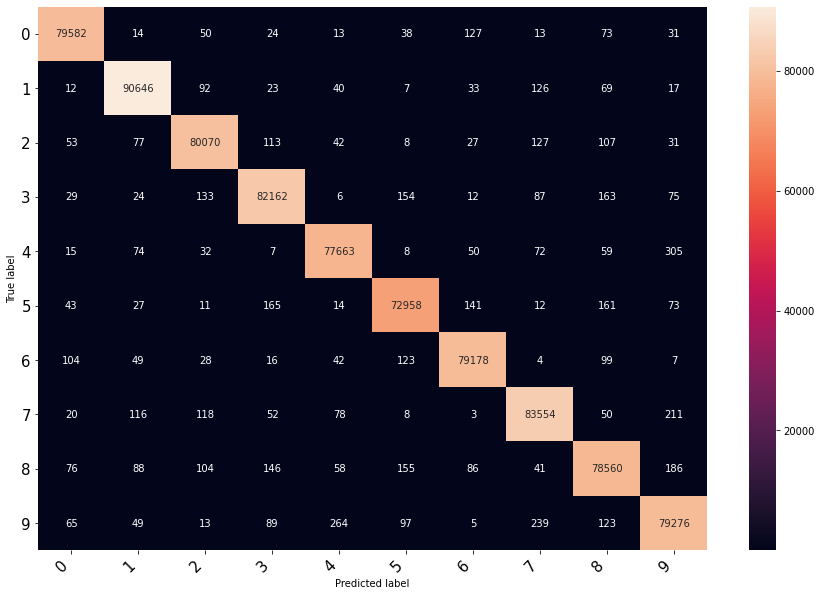

Epoch=  16 , batch =  0 , cost =  0.0001624592550797388 , accuracy =  1.0
Epoch=  16 , batch =  625 , cost =  1.2548531231004745e-05 , accuracy =  1.0
Epoch=  16 , batch =  1250 , cost =  6.220924660738092e-06 , accuracy =  1.0
Validate Epoch=  16 , batch =  0 , cost =  0.0 , accuracy =  1.0
Epoch:  16  averaged cost =  0.00043614403693936765  train accuracy =  0.99264569757109


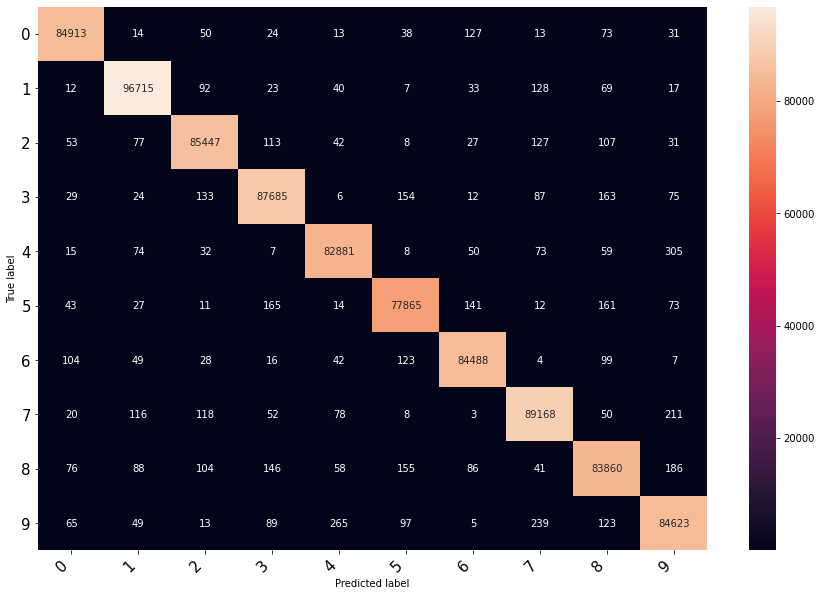

Epoch=  17 , batch =  0 , cost =  9.118198249780107e-06 , accuracy =  1.0
Epoch=  17 , batch =  625 , cost =  4.507288394961506e-06 , accuracy =  1.0
Epoch=  17 , batch =  1250 , cost =  1.3196116015024018e-05 , accuracy =  1.0
Validate Epoch=  17 , batch =  0 , cost =  9.61119894782314e-07 , accuracy =  1.0
Epoch:  17  averaged cost =  0.0003067274810746312  train accuracy =  0.9930772145943686


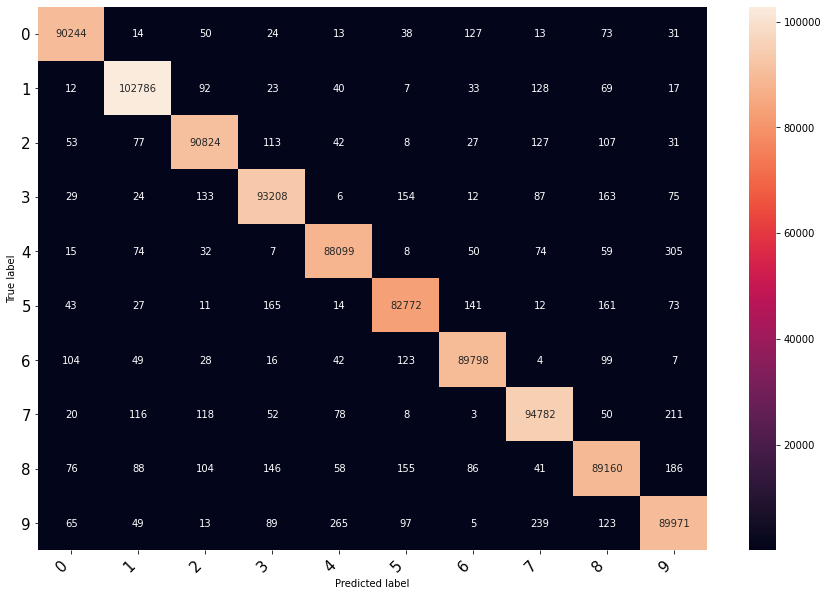

Epoch=  18 , batch =  0 , cost =  0.0006507372600026429 , accuracy =  1.0
Epoch=  18 , batch =  625 , cost =  1.5459839914910845e-06 , accuracy =  1.0
Epoch=  18 , batch =  1250 , cost =  6.924851732037496e-06 , accuracy =  1.0
Validate Epoch=  18 , batch =  0 , cost =  8.940690321423972e-08 , accuracy =  1.0
Epoch:  18  averaged cost =  0.00028217752696946263  train accuracy =  0.9934597567798842


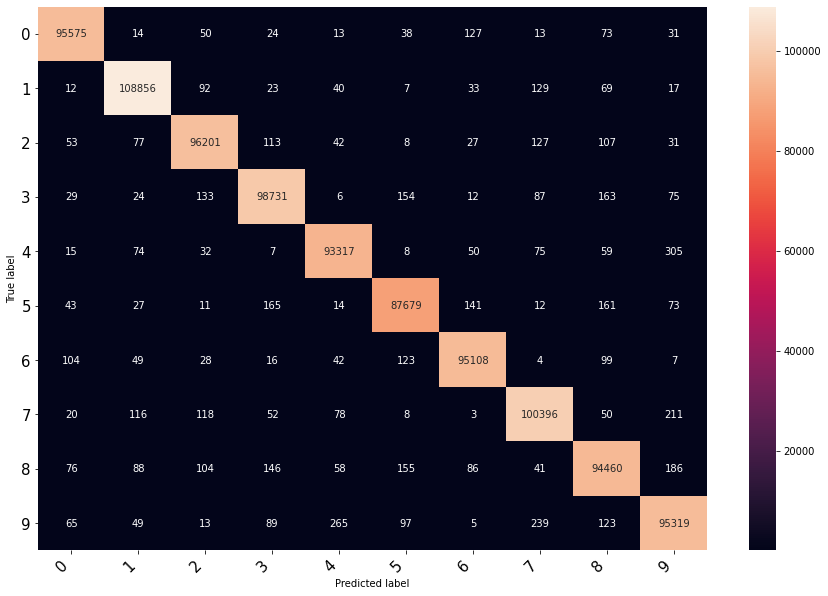

Epoch=  19 , batch =  0 , cost =  1.6130113635881571e-06 , accuracy =  1.0
Epoch=  19 , batch =  625 , cost =  4.246811329267075e-07 , accuracy =  1.0
Epoch=  19 , batch =  1250 , cost =  7.972042794790468e-07 , accuracy =  1.0
Validate Epoch=  19 , batch =  0 , cost =  3.427261390243075e-07 , accuracy =  1.0
Epoch:  19  averaged cost =  0.0002242909831693396  train accuracy =  0.9938030057370916


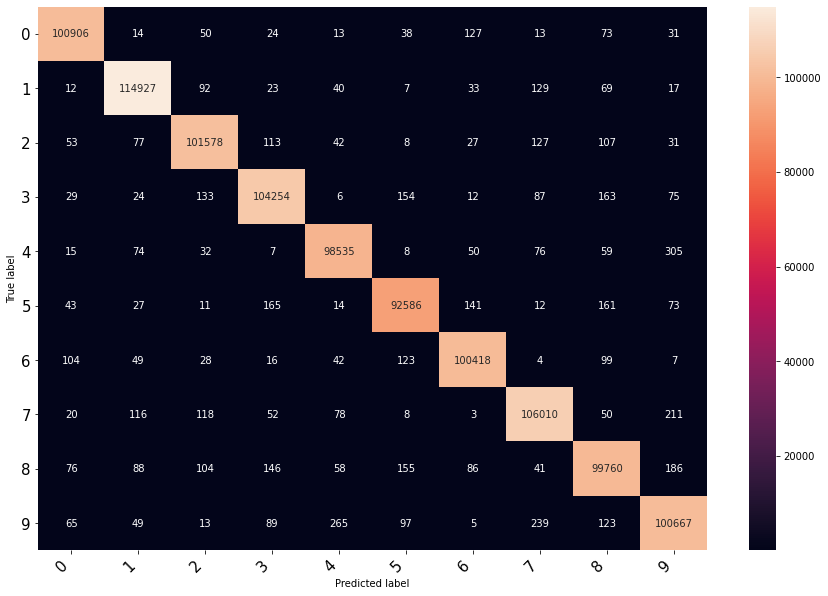

Epoch=  20 , batch =  0 , cost =  7.078028261275904e-07 , accuracy =  1.0
Epoch=  20 , batch =  625 , cost =  6.221177955012536e-07 , accuracy =  1.0
Epoch=  20 , batch =  1250 , cost =  0.0 , accuracy =  1.0
Validate Epoch=  20 , batch =  0 , cost =  1.4901160305669237e-08 , accuracy =  1.0
Epoch:  20  averaged cost =  0.00017027536523528397  train accuracy =  0.9941119297985782


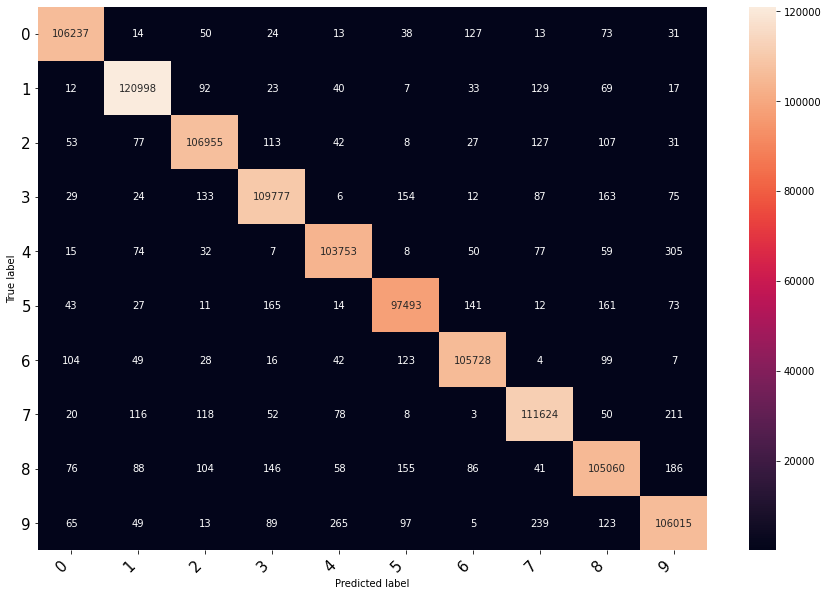

Epoch=  21 , batch =  0 , cost =  1.3411033705779118e-07 , accuracy =  1.0
Epoch=  21 , batch =  625 , cost =  2.6822010568139376e-07 , accuracy =  1.0
Epoch=  21 , batch =  1250 , cost =  1.4901157641133977e-08 , accuracy =  1.0
Validate Epoch=  21 , batch =  0 , cost =  2.2351738238057806e-08 , accuracy =  1.0
Epoch:  21  averaged cost =  0.000160765164764598  train accuracy =  0.9943914325208757


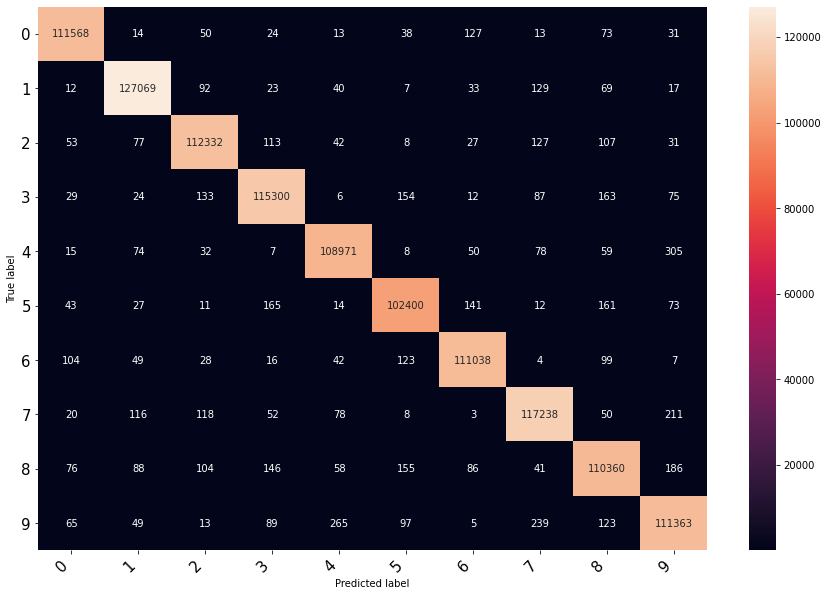

Epoch=  22 , batch =  0 , cost =  3.725290076417309e-09 , accuracy =  1.0
Epoch=  22 , batch =  625 , cost =  8.940692453052179e-08 , accuracy =  1.0
Epoch=  22 , batch =  1250 , cost =  2.9018674467806704e-06 , accuracy =  1.0
Validate Epoch=  22 , batch =  0 , cost =  2.2351738238057806e-08 , accuracy =  1.0
Epoch:  22  averaged cost =  0.00015378378157038242  train accuracy =  0.9946455259047824


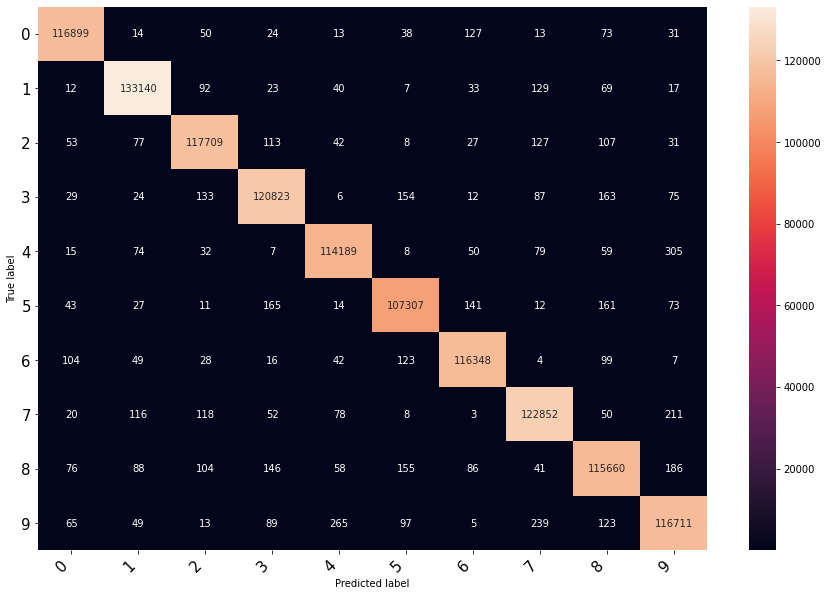

Epoch=  23 , batch =  0 , cost =  1.7881185385704157e-06 , accuracy =  1.0
Epoch=  23 , batch =  625 , cost =  4.200969124212861e-05 , accuracy =  1.0
Epoch=  23 , batch =  1250 , cost =  1.1175851000189141e-07 , accuracy =  1.0
Validate Epoch=  23 , batch =  0 , cost =  7.286246727744583e-06 , accuracy =  1.0
Epoch:  23  averaged cost =  0.00014474312774837017  train accuracy =  0.9948775242118277


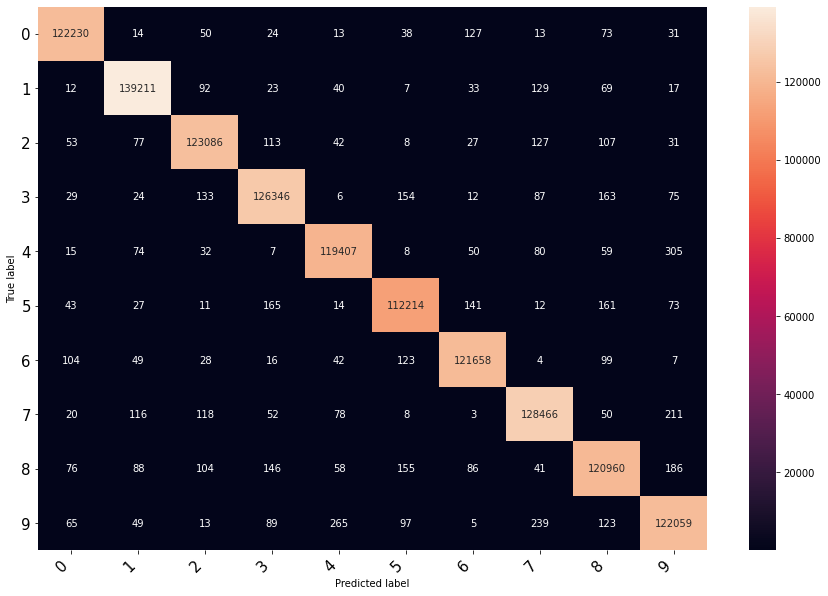

Epoch=  24 , batch =  0 , cost =  1.6130096582855913e-06 , accuracy =  1.0
Epoch=  24 , batch =  625 , cost =  1.3411019494924403e-07 , accuracy =  1.0
Epoch=  24 , batch =  1250 , cost =  1.2107037719033542e-06 , accuracy =  1.0
Validate Epoch=  24 , batch =  0 , cost =  2.764299097179901e-05 , accuracy =  1.0
Epoch:  24  averaged cost =  0.0001434890873497352  train accuracy =  0.9950901893266193


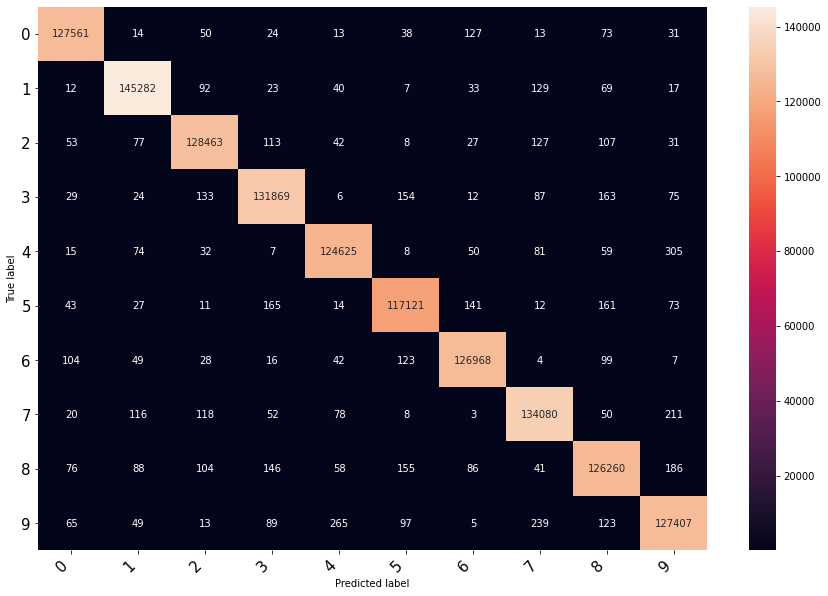

Epoch=  25 , batch =  0 , cost =  1.0035257218987681e-05 , accuracy =  1.0
Epoch=  25 , batch =  625 , cost =  1.4901159417490817e-08 , accuracy =  1.0
Epoch=  25 , batch =  1250 , cost =  3.840538738586474e-06 , accuracy =  1.0
Validate Epoch=  25 , batch =  0 , cost =  0.0 , accuracy =  1.0
Epoch:  25  averaged cost =  0.00014428656140808016  train accuracy =  0.9952858412322275


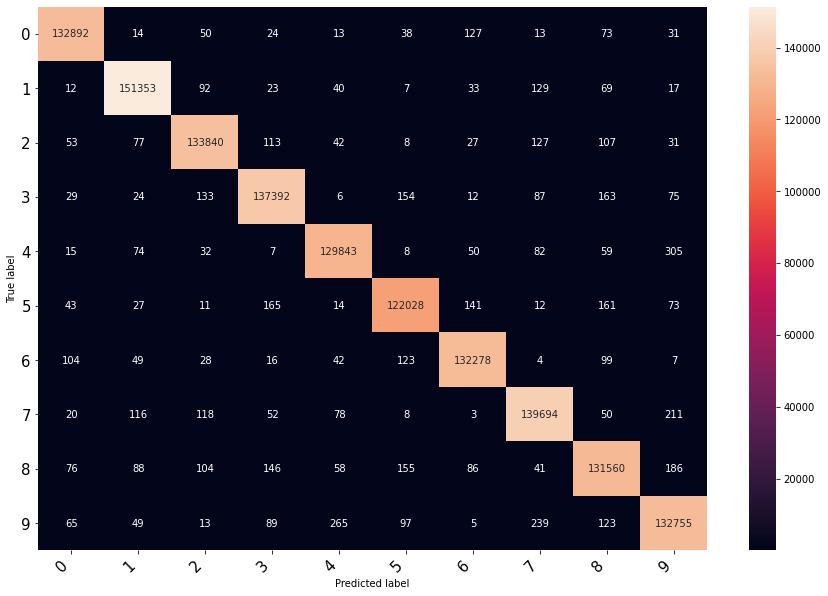

Learning Finished!
 averaged cost =  0.016105872750049457  train accuracy =  98.71185758410573


In [179]:
#Training Optimizer1
print('Training Optimizer1 the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 25
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer1.zero_grad() 
        
        hypothesis = model1(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        #predlist=torch.cat([predlist,preds.view(-1).cpu()])
        #lbllist=torch.cat([lbllist,Y.view(-1).cpu()])
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer1.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch
    model1.eval()    
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model1(X)
        #costv = criterion(hypothesis, Y)     
        #costv.backward()
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                #print(prediction)
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        #acc.append(accuracy)
        avgv+=cost.data/total_batch
    
    scheduler1.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))
    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


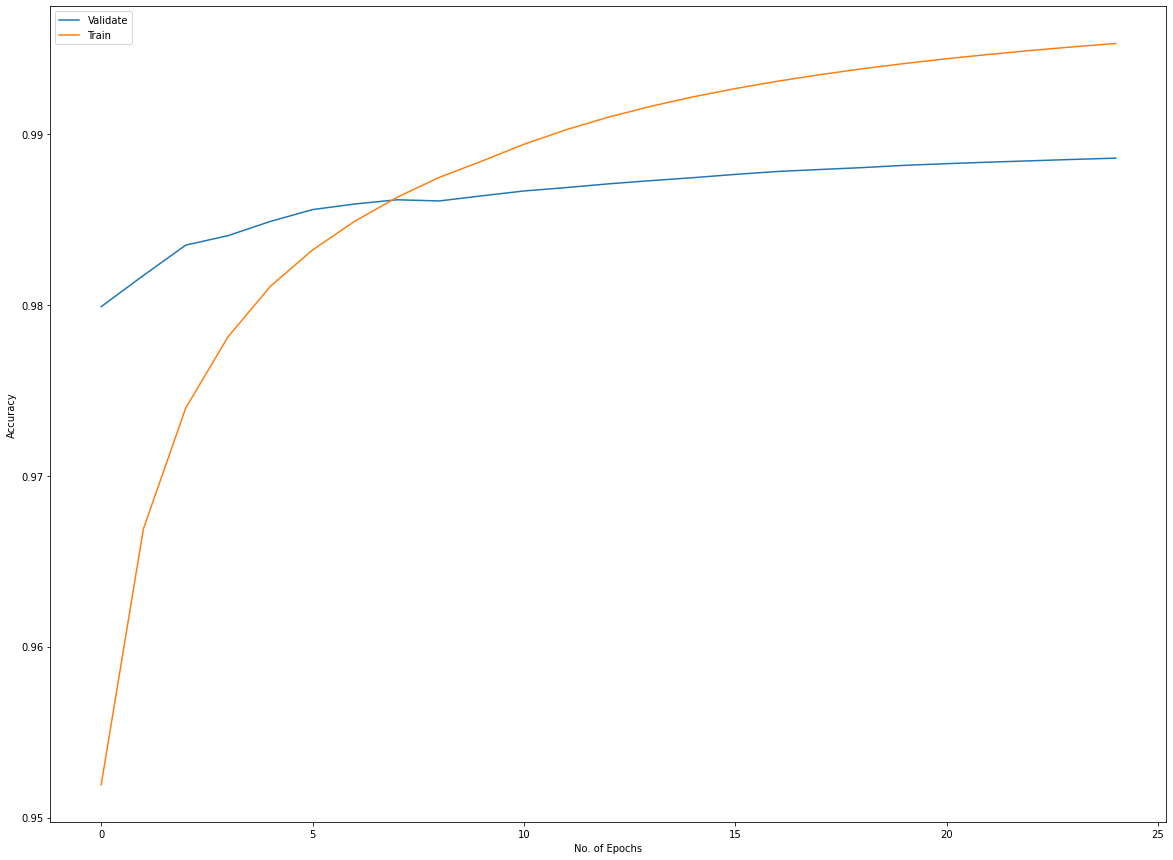

In [180]:
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Curves


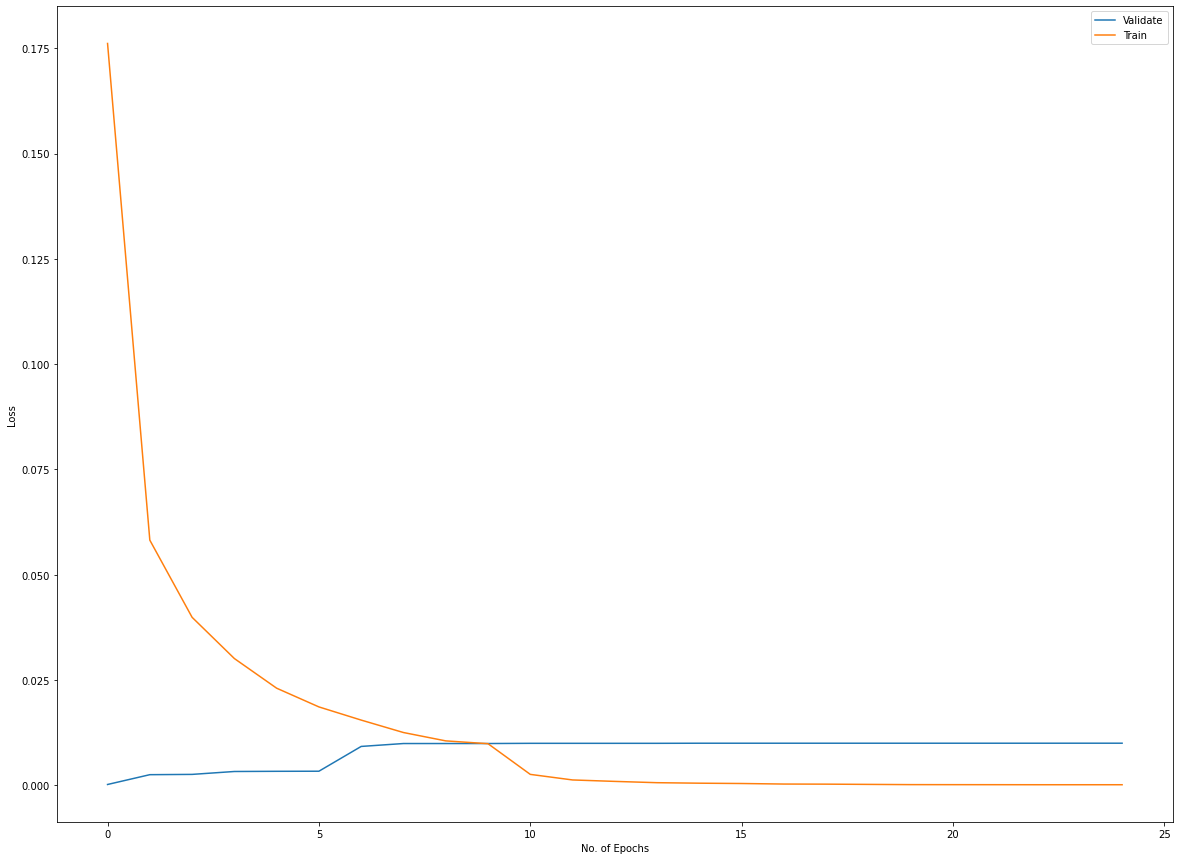

In [181]:
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training Optimizer2 the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 25
Epoch=  1 , batch =  0 , cost =  2.5537352561950684 , accuracy =  0.125
Epoch=  1 , batch =  625 , cost =  0.08458676189184189 , accuracy =  0.96875
Epoch=  1 , batch =  1250 , cost =  0.20385995507240295 , accuracy =  0.90625
Validate Epoch=  1 , batch =  0 , cost =  0.5278128385543823 , accuracy =  0.96875
Epoch:  1  averaged cost =  0.44389280676841736  train accuracy =  0.8884589751184834


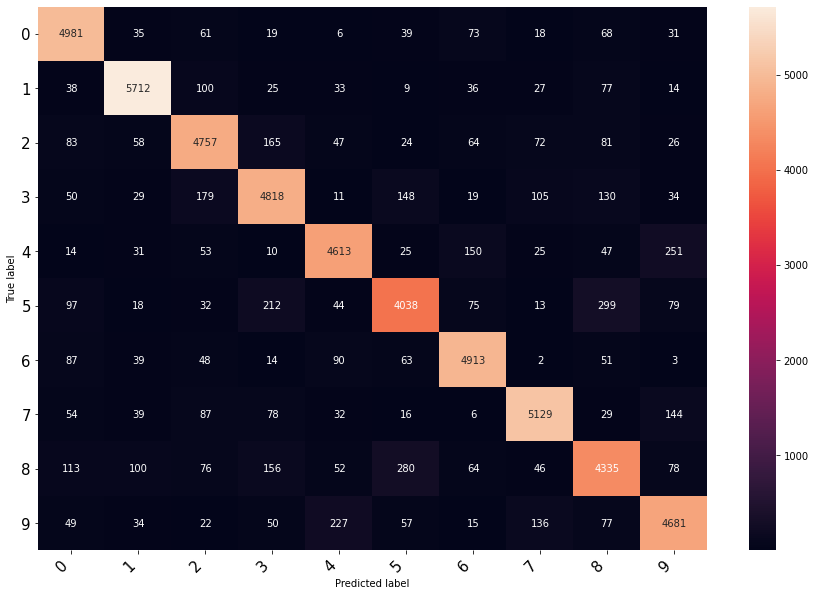

Epoch=  2 , batch =  0 , cost =  0.39848923683166504 , accuracy =  0.90625
Epoch=  2 , batch =  625 , cost =  0.4843921959400177 , accuracy =  0.84375
Epoch=  2 , batch =  1250 , cost =  0.11246215552091599 , accuracy =  0.9375
Validate Epoch=  2 , batch =  0 , cost =  0.2336023449897766 , accuracy =  1.0
Epoch:  2  averaged cost =  0.23161311447620392  train accuracy =  0.9109523104265402


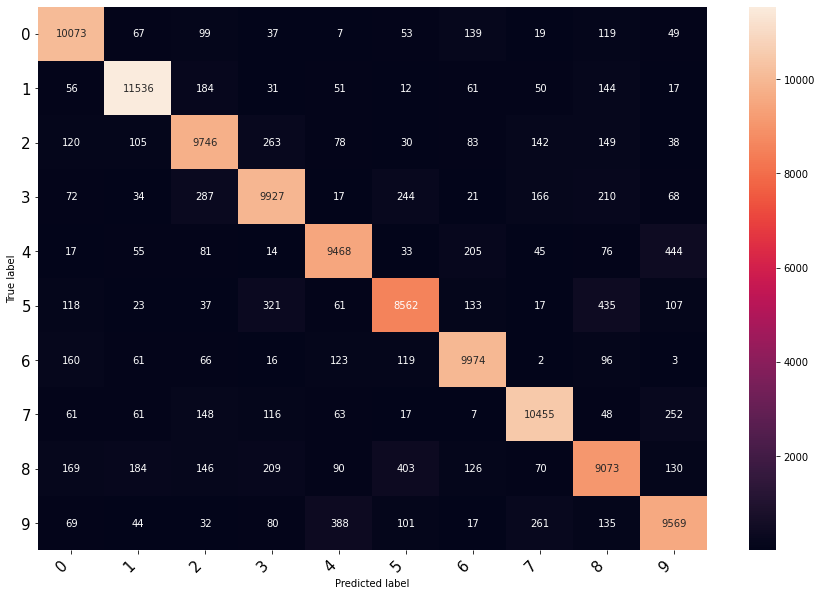

Epoch=  3 , batch =  0 , cost =  0.27028772234916687 , accuracy =  0.9375
Epoch=  3 , batch =  625 , cost =  0.032770995050668716 , accuracy =  1.0
Epoch=  3 , batch =  1250 , cost =  0.03547776862978935 , accuracy =  1.0
Validate Epoch=  3 , batch =  0 , cost =  0.3850112855434418 , accuracy =  0.96875
Epoch:  3  averaged cost =  0.20796625316143036  train accuracy =  0.9209493483412322


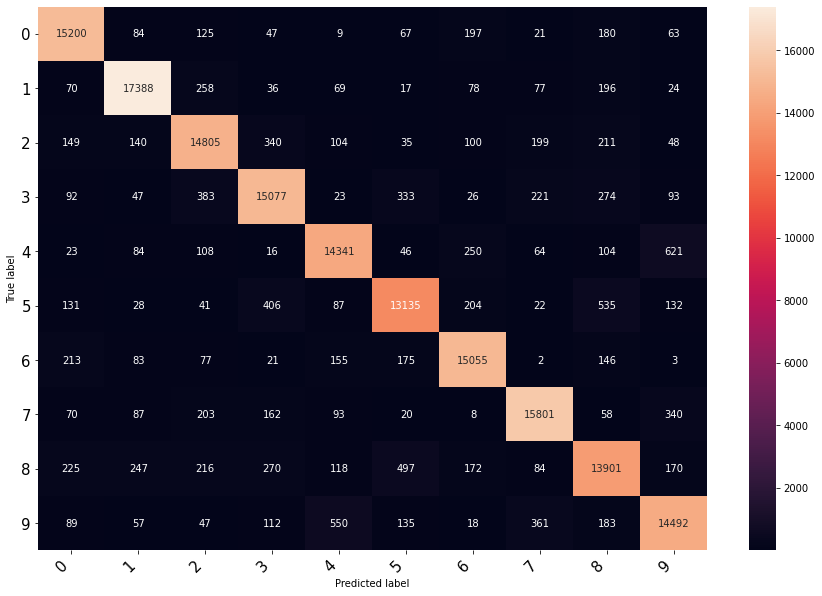

Epoch=  4 , batch =  0 , cost =  0.0622829906642437 , accuracy =  1.0
Epoch=  4 , batch =  625 , cost =  0.1499371975660324 , accuracy =  0.9375
Epoch=  4 , batch =  1250 , cost =  0.06316718459129333 , accuracy =  1.0
Validate Epoch=  4 , batch =  0 , cost =  0.35359615087509155 , accuracy =  0.96875
Epoch:  4  averaged cost =  0.2156263142824173  train accuracy =  0.9258738151658767


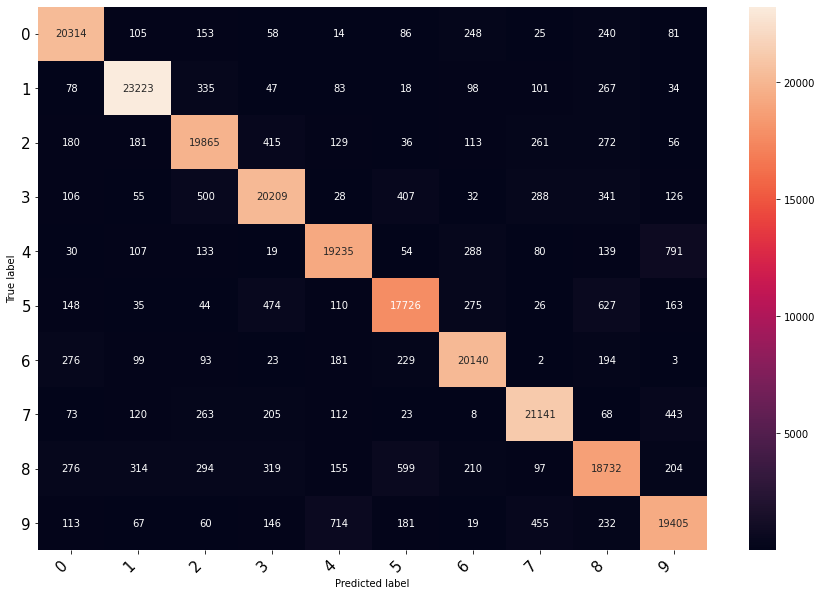

Epoch=  5 , batch =  0 , cost =  0.04203204810619354 , accuracy =  1.0
Epoch=  5 , batch =  625 , cost =  0.2775142788887024 , accuracy =  0.9375
Epoch=  5 , batch =  1250 , cost =  0.30281224846839905 , accuracy =  0.9375
Validate Epoch=  5 , batch =  0 , cost =  0.08894895762205124 , accuracy =  0.90625
Epoch:  5  averaged cost =  0.21268527209758759  train accuracy =  0.9292654028436019


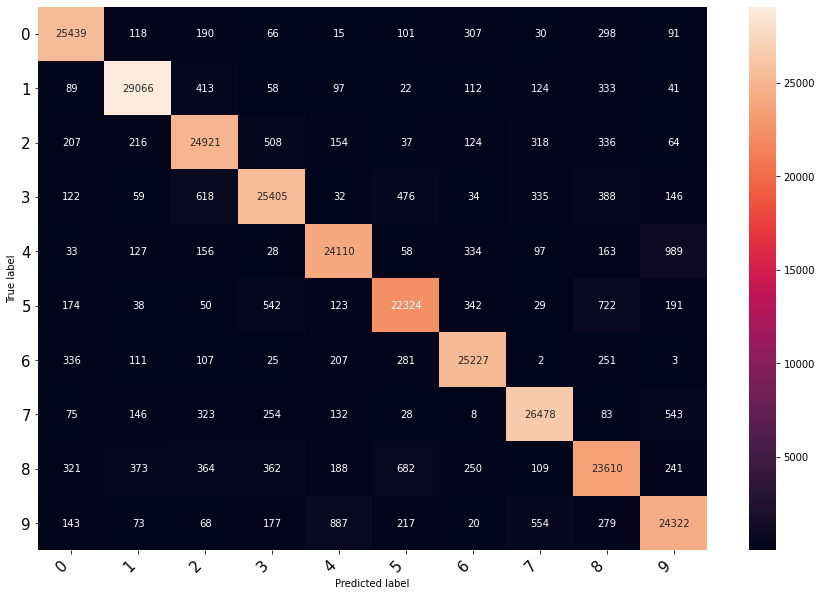

Epoch=  6 , batch =  0 , cost =  0.21152429282665253 , accuracy =  0.875
Epoch=  6 , batch =  625 , cost =  0.12405476719141006 , accuracy =  0.96875
Epoch=  6 , batch =  1250 , cost =  0.10520335286855698 , accuracy =  0.96875
Validate Epoch=  6 , batch =  0 , cost =  0.2580623924732208 , accuracy =  0.96875
Epoch:  6  averaged cost =  0.20890752971172333  train accuracy =  0.9317918147709321


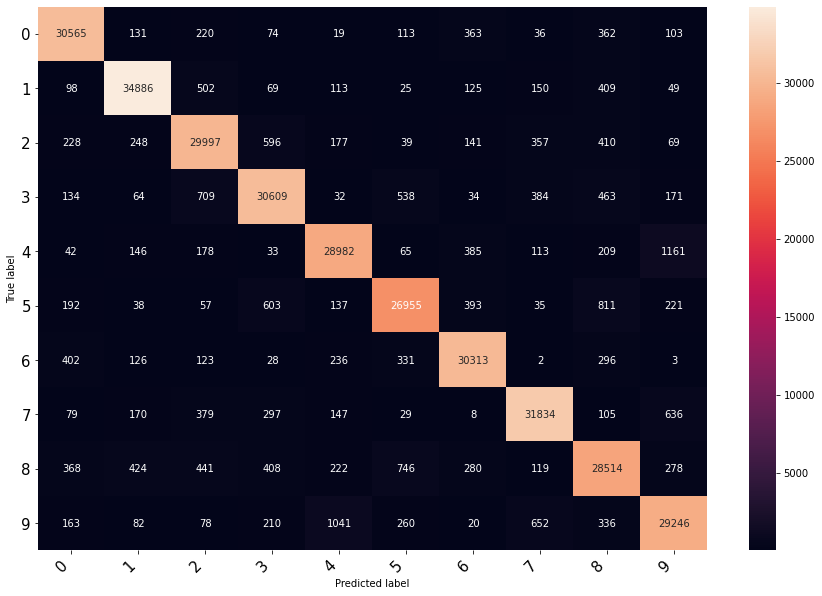

Epoch=  7 , batch =  0 , cost =  0.5106207132339478 , accuracy =  0.8125
Epoch=  7 , batch =  625 , cost =  0.14213040471076965 , accuracy =  0.96875
Epoch=  7 , batch =  1250 , cost =  0.14786989986896515 , accuracy =  0.96875
Validate Epoch=  7 , batch =  0 , cost =  0.11836415529251099 , accuracy =  0.96875
Epoch:  7  averaged cost =  0.2068089097738266  train accuracy =  0.9338582219025051


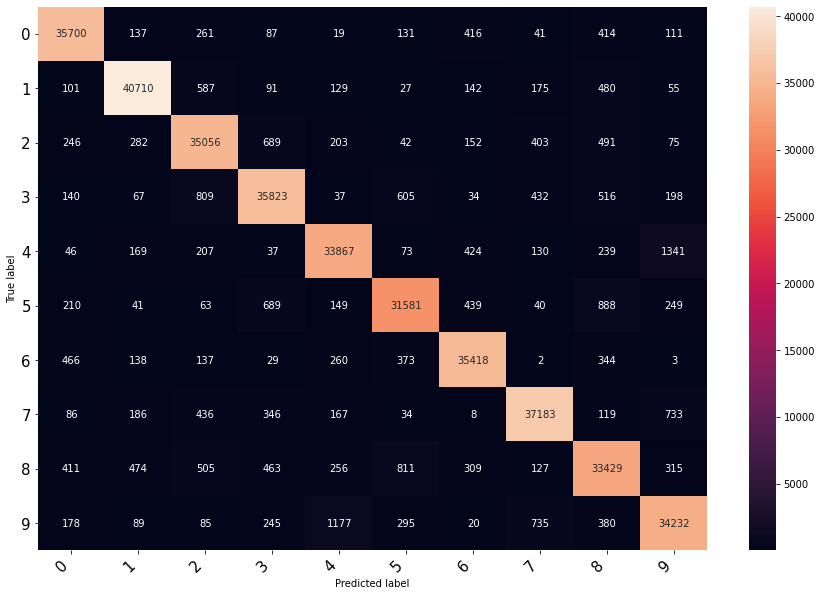

Epoch=  8 , batch =  0 , cost =  0.16020521521568298 , accuracy =  0.96875
Epoch=  8 , batch =  625 , cost =  0.3626691699028015 , accuracy =  0.90625
Epoch=  8 , batch =  1250 , cost =  0.2049010545015335 , accuracy =  0.90625
Validate Epoch=  8 , batch =  0 , cost =  0.6177164316177368 , accuracy =  0.78125
Epoch:  8  averaged cost =  0.2163611203432083  train accuracy =  0.935317776214455


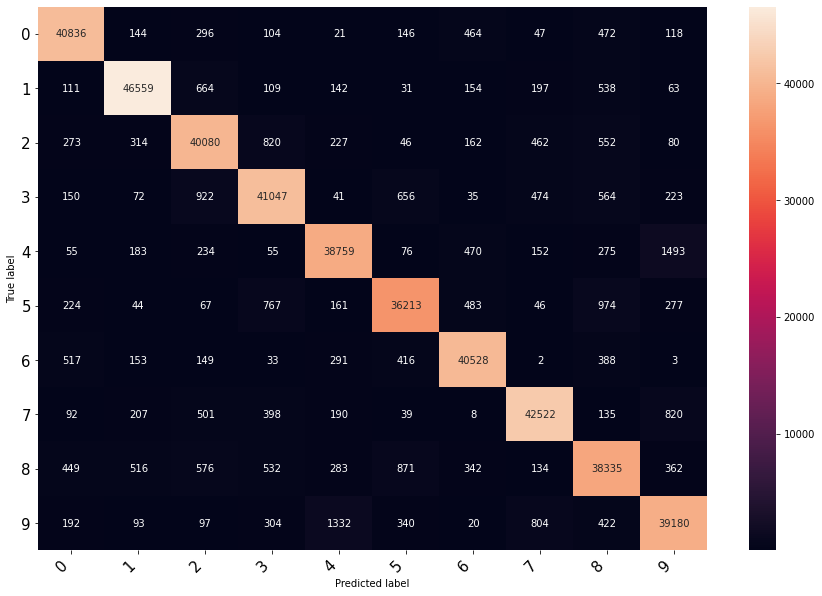

Epoch=  9 , batch =  0 , cost =  0.15960273146629333 , accuracy =  0.9375
Epoch=  9 , batch =  625 , cost =  0.2565701901912689 , accuracy =  0.96875
Epoch=  9 , batch =  1250 , cost =  0.17274178564548492 , accuracy =  0.9375
Validate Epoch=  9 , batch =  0 , cost =  0.26855528354644775 , accuracy =  0.96875
Epoch:  9  averaged cost =  0.20156654715538025  train accuracy =  0.9369240389678778


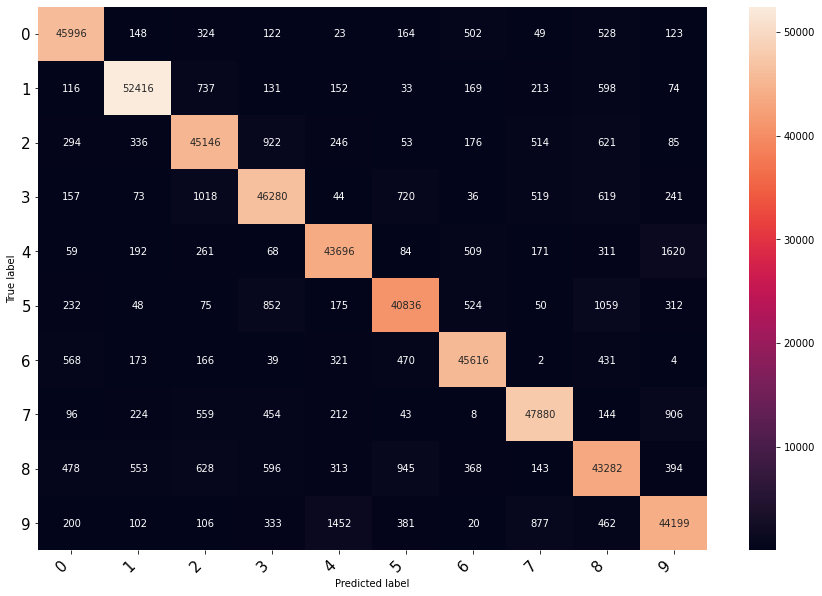

Epoch=  10 , batch =  0 , cost =  0.058322541415691376 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.09121908992528915 , accuracy =  0.96875
Epoch=  10 , batch =  1250 , cost =  0.019109804183244705 , accuracy =  1.0
Validate Epoch=  10 , batch =  0 , cost =  0.00477127730846405 , accuracy =  0.96875
Epoch:  10  averaged cost =  0.20535247027873993  train accuracy =  0.9381072274881517


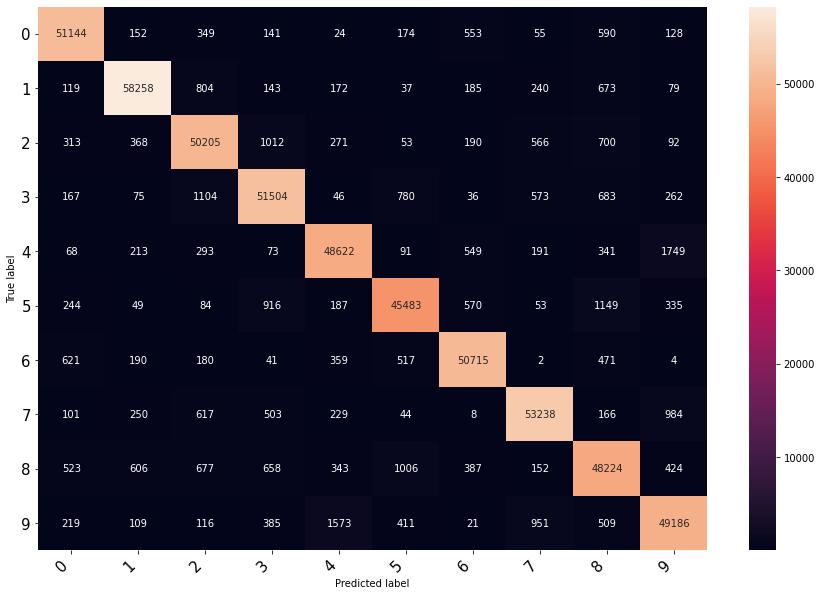

Epoch=  11 , batch =  0 , cost =  0.47207173705101013 , accuracy =  0.9375
Epoch=  11 , batch =  625 , cost =  0.06863021105527878 , accuracy =  0.96875
Epoch=  11 , batch =  1250 , cost =  0.061749834567308426 , accuracy =  0.96875
Validate Epoch=  11 , batch =  0 , cost =  0.09087717533111572 , accuracy =  1.0
Epoch:  11  averaged cost =  0.11638718098402023  train accuracy =  0.940805417923309


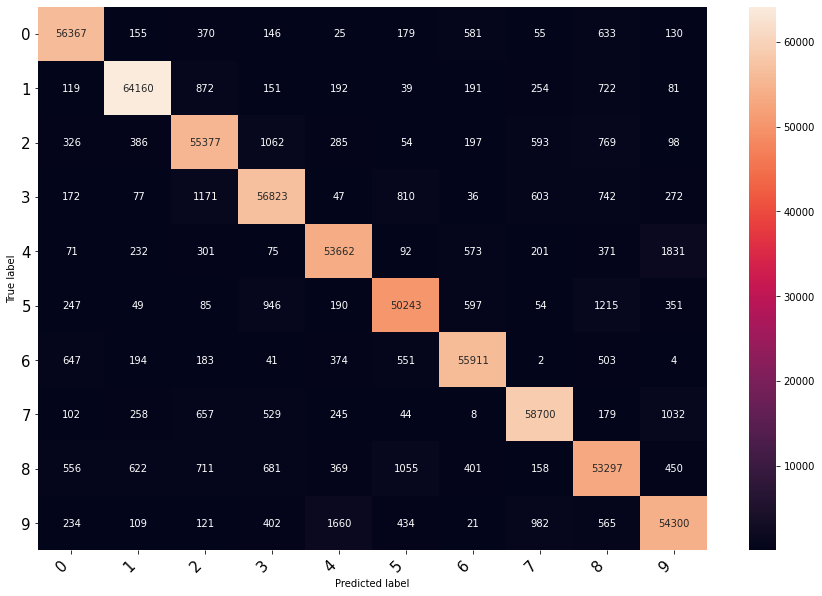

Epoch=  12 , batch =  0 , cost =  0.20967821776866913 , accuracy =  0.90625
Epoch=  12 , batch =  625 , cost =  0.02126540243625641 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  0.016266249120235443 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  0.03782610595226288 , accuracy =  0.96875
Epoch:  12  averaged cost =  0.09403325617313385  train accuracy =  0.9434843379739336


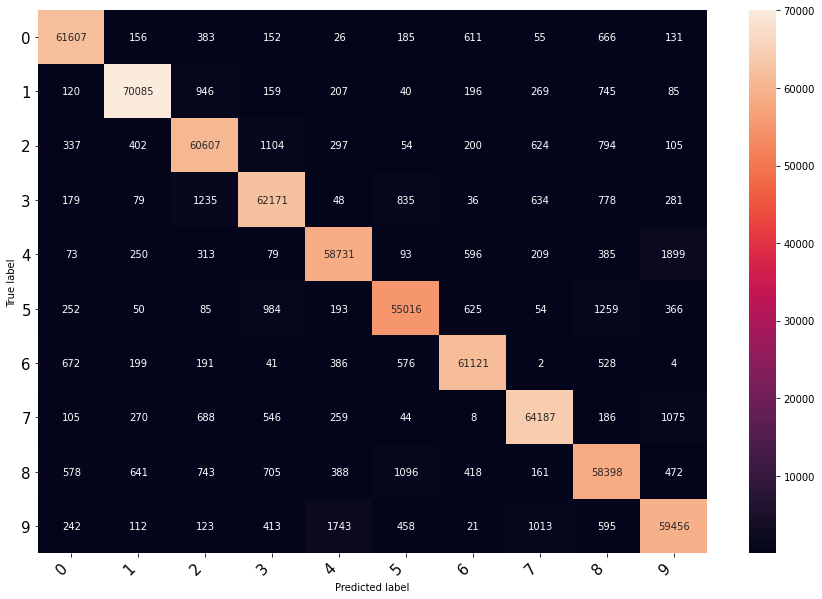

Epoch=  13 , batch =  0 , cost =  0.02169877290725708 , accuracy =  1.0
Epoch=  13 , batch =  625 , cost =  0.11966302245855331 , accuracy =  0.96875
Epoch=  13 , batch =  1250 , cost =  0.02586531825363636 , accuracy =  1.0
Validate Epoch=  13 , batch =  0 , cost =  0.007989672012627125 , accuracy =  1.0
Epoch:  13  averaged cost =  0.08685228228569031  train accuracy =  0.9458650428363106


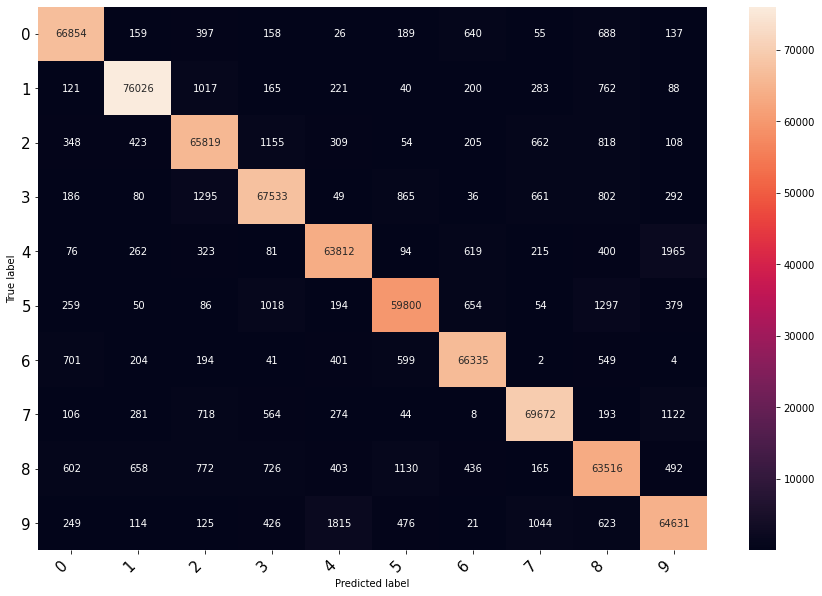

Epoch=  14 , batch =  0 , cost =  0.05617675557732582 , accuracy =  0.96875
Epoch=  14 , batch =  625 , cost =  0.11070480197668076 , accuracy =  0.96875
Epoch=  14 , batch =  1250 , cost =  0.09914364665746689 , accuracy =  0.96875
Validate Epoch=  14 , batch =  0 , cost =  0.017183275893330574 , accuracy =  1.0
Epoch:  14  averaged cost =  0.08212538808584213  train accuracy =  0.9480127581245769


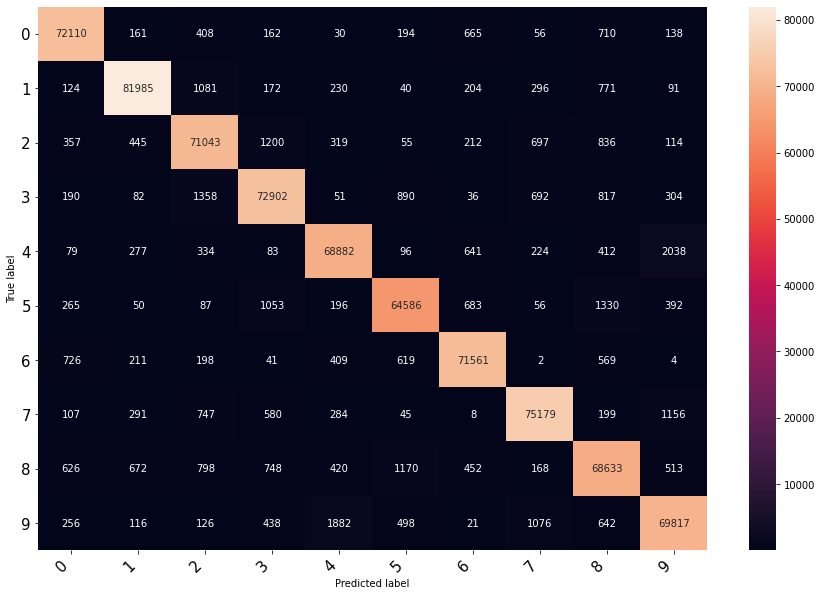

Epoch=  15 , batch =  0 , cost =  0.01260607410222292 , accuracy =  1.0
Epoch=  15 , batch =  625 , cost =  0.11413022130727768 , accuracy =  0.9375
Epoch=  15 , batch =  1250 , cost =  0.09476198256015778 , accuracy =  0.96875
Validate Epoch=  15 , batch =  0 , cost =  0.09548180550336838 , accuracy =  0.96875
Epoch:  15  averaged cost =  0.08014457672834396  train accuracy =  0.9499000296208531


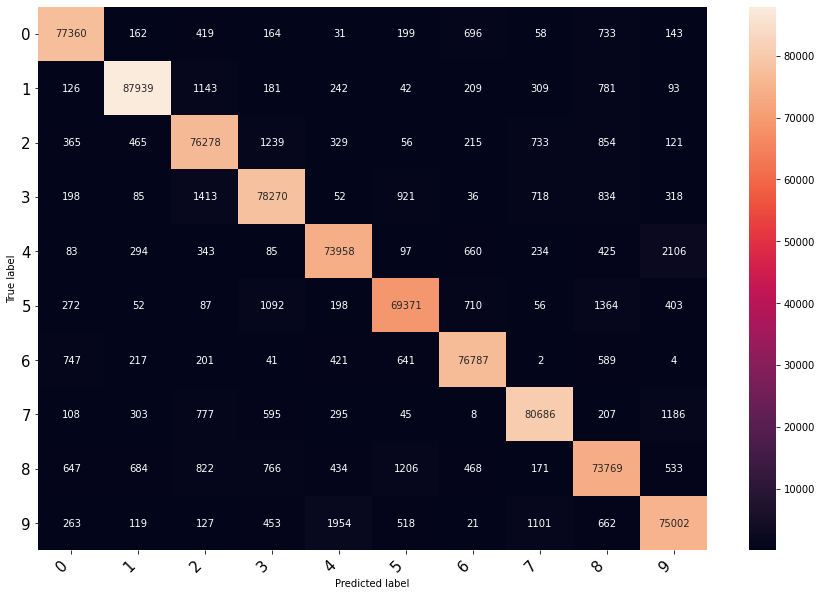

Epoch=  16 , batch =  0 , cost =  0.13688068091869354 , accuracy =  0.9375
Epoch=  16 , batch =  625 , cost =  0.10950914025306702 , accuracy =  0.96875
Epoch=  16 , batch =  1250 , cost =  0.01541648805141449 , accuracy =  1.0
Validate Epoch=  16 , batch =  0 , cost =  0.0031359437853097916 , accuracy =  1.0
Epoch:  16  averaged cost =  0.07706226408481598  train accuracy =  0.9515861041172986


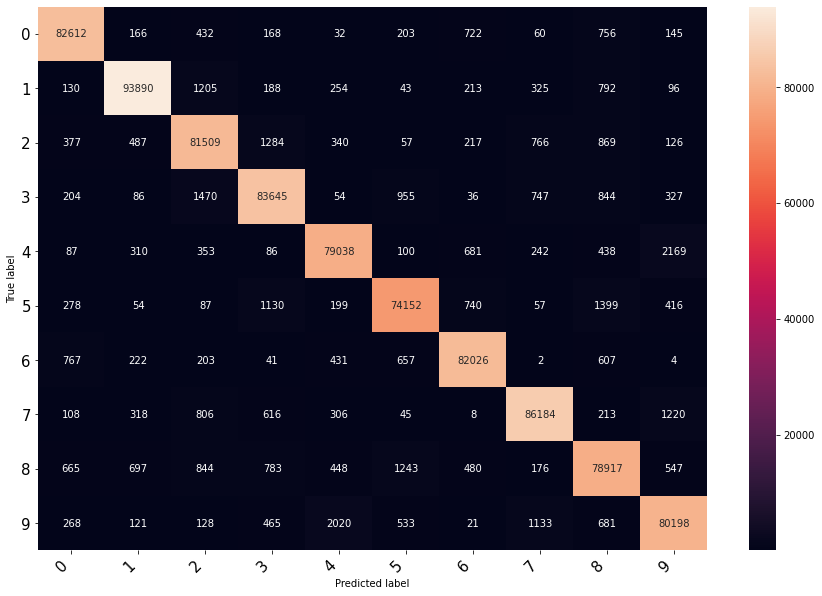

Epoch=  17 , batch =  0 , cost =  0.03172596916556358 , accuracy =  1.0
Epoch=  17 , batch =  625 , cost =  0.043066900223493576 , accuracy =  1.0
Epoch=  17 , batch =  1250 , cost =  0.017491135746240616 , accuracy =  1.0
Validate Epoch=  17 , batch =  0 , cost =  0.06695933640003204 , accuracy =  0.96875
Epoch:  17  averaged cost =  0.07583671808242798  train accuracy =  0.9530749059102314


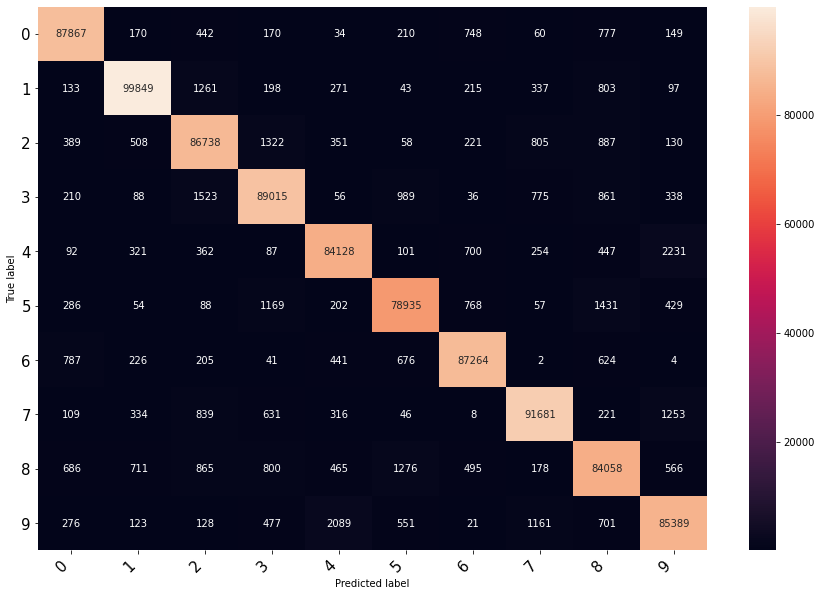

Epoch=  18 , batch =  0 , cost =  0.15992924571037292 , accuracy =  0.9375
Epoch=  18 , batch =  625 , cost =  0.010432448238134384 , accuracy =  1.0
Epoch=  18 , batch =  1250 , cost =  0.0007039418560452759 , accuracy =  1.0
Validate Epoch=  18 , batch =  0 , cost =  0.03193264082074165 , accuracy =  0.90625
Epoch:  18  averaged cost =  0.07305071502923965  train accuracy =  0.9544661664033702


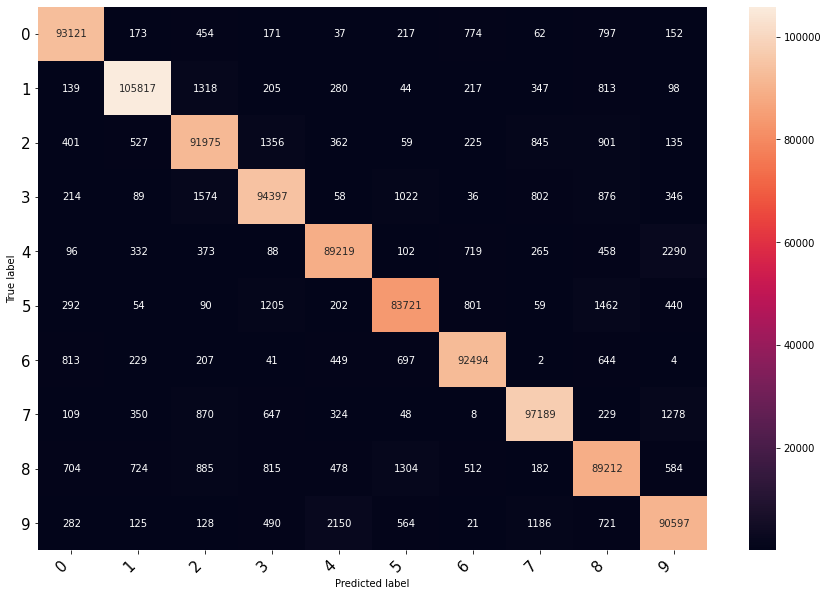

Epoch=  19 , batch =  0 , cost =  0.04327456280589104 , accuracy =  1.0
Epoch=  19 , batch =  625 , cost =  0.1258832961320877 , accuracy =  0.96875
Epoch=  19 , batch =  1250 , cost =  0.03624798357486725 , accuracy =  1.0
Validate Epoch=  19 , batch =  0 , cost =  0.026604680344462395 , accuracy =  0.9375
Epoch:  19  averaged cost =  0.07189401984214783  train accuracy =  0.9557100040533799


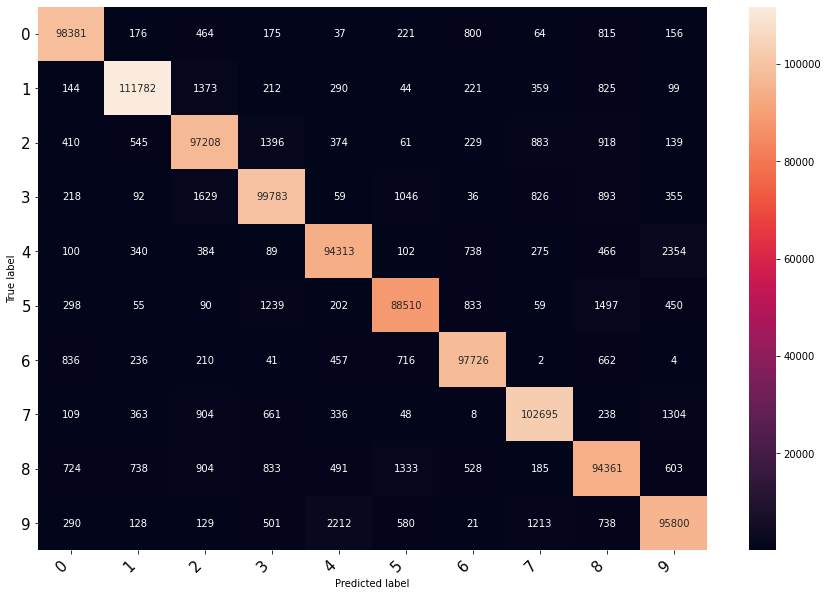

Epoch=  20 , batch =  0 , cost =  0.008411627262830734 , accuracy =  1.0
Epoch=  20 , batch =  625 , cost =  0.0728858932852745 , accuracy =  0.96875
Epoch=  20 , batch =  1250 , cost =  0.01652609556913376 , accuracy =  1.0
Validate Epoch=  20 , batch =  0 , cost =  0.04487728700041771 , accuracy =  0.90625
Epoch:  20  averaged cost =  0.07060369104146957  train accuracy =  0.9568507479265402


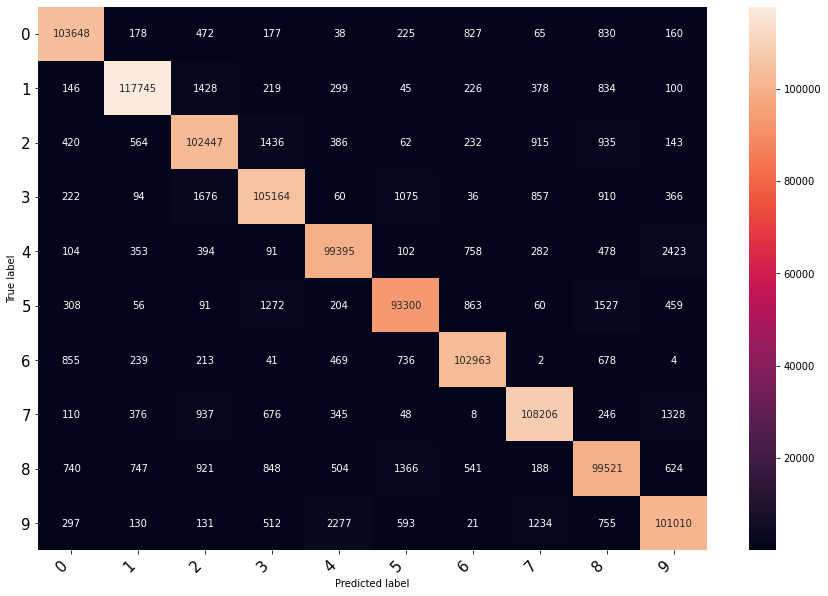

Epoch=  21 , batch =  0 , cost =  0.23245769739151 , accuracy =  0.90625
Epoch=  21 , batch =  625 , cost =  0.041338127106428146 , accuracy =  0.96875
Epoch=  21 , batch =  1250 , cost =  0.06581306457519531 , accuracy =  0.96875
Validate Epoch=  21 , batch =  0 , cost =  0.05632946640253067 , accuracy =  1.0
Epoch:  21  averaged cost =  0.061413850635290146  train accuracy =  0.9580142039043106


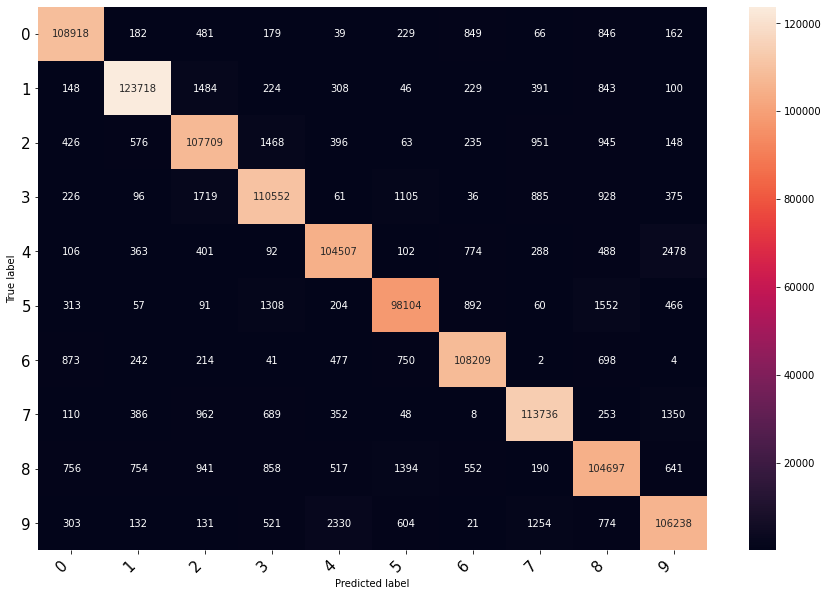

Epoch=  22 , batch =  0 , cost =  0.026733731850981712 , accuracy =  1.0
Epoch=  22 , batch =  625 , cost =  0.011837242171168327 , accuracy =  1.0
Epoch=  22 , batch =  1250 , cost =  0.14243946969509125 , accuracy =  0.96875
Validate Epoch=  22 , batch =  0 , cost =  0.0776437297463417 , accuracy =  0.96875
Epoch:  22  averaged cost =  0.060434963554143906  train accuracy =  0.9590937701960361


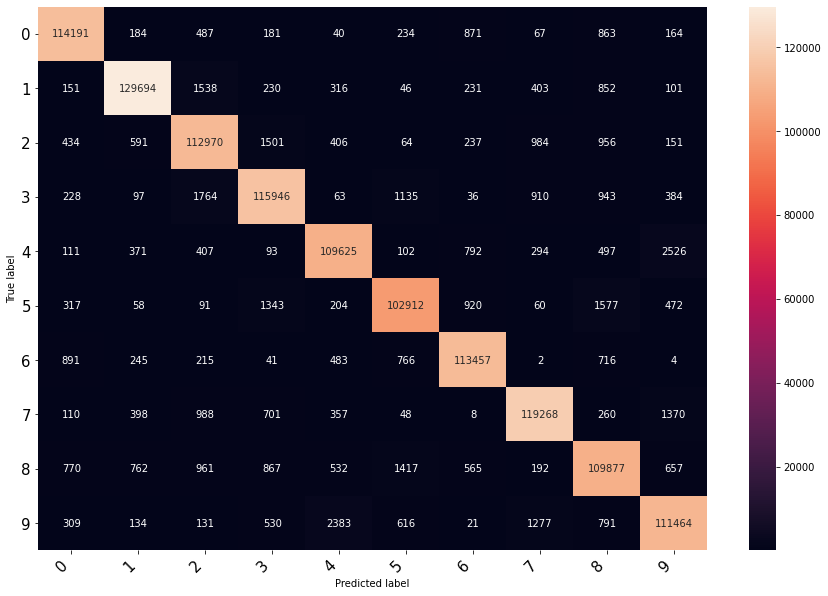

Epoch=  23 , batch =  0 , cost =  0.05875524505972862 , accuracy =  0.96875
Epoch=  23 , batch =  625 , cost =  0.007677585352212191 , accuracy =  1.0
Epoch=  23 , batch =  1250 , cost =  0.04586620256304741 , accuracy =  0.96875
Validate Epoch=  23 , batch =  0 , cost =  0.015740878880023956 , accuracy =  1.0
Epoch:  23  averaged cost =  0.05987267568707466  train accuracy =  0.9600875103029054


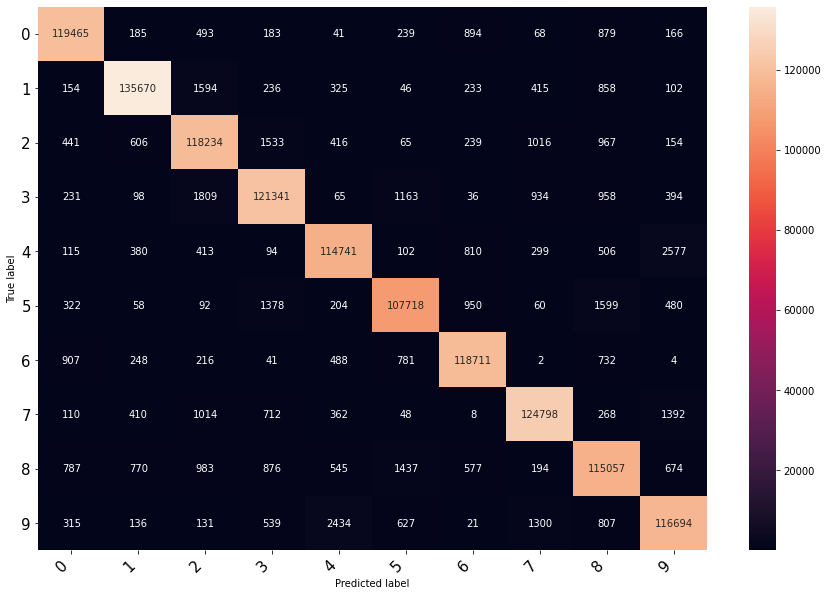

Epoch=  24 , batch =  0 , cost =  0.1986214816570282 , accuracy =  0.96875
Epoch=  24 , batch =  625 , cost =  0.09273909032344818 , accuracy =  0.96875
Epoch=  24 , batch =  1250 , cost =  0.02391877770423889 , accuracy =  1.0
Validate Epoch=  24 , batch =  0 , cost =  0.006946756970137358 , accuracy =  1.0
Epoch:  24  averaged cost =  0.05952389910817146  train accuracy =  0.960985325335703


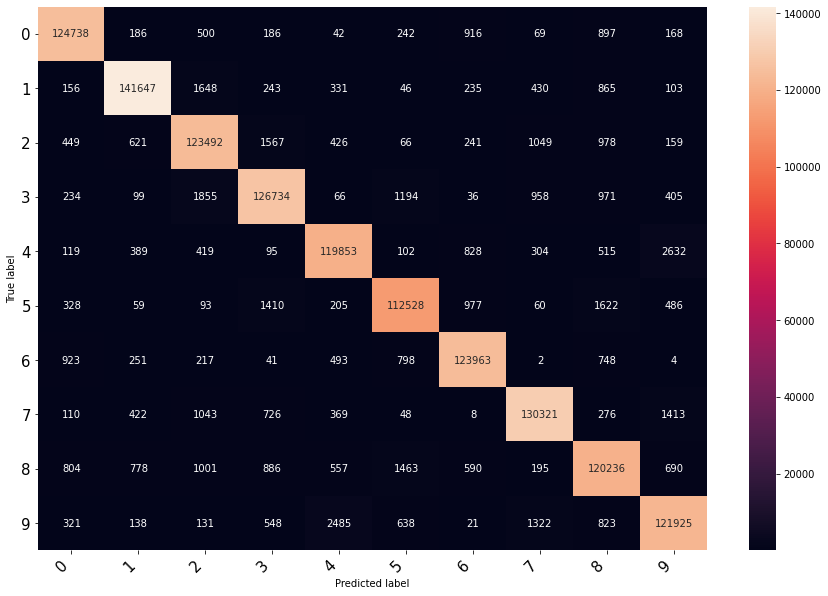

Epoch=  25 , batch =  0 , cost =  0.03986918926239014 , accuracy =  0.96875
Epoch=  25 , batch =  625 , cost =  0.11778022348880768 , accuracy =  0.96875
Epoch=  25 , batch =  1250 , cost =  0.3532189428806305 , accuracy =  0.96875
Validate Epoch=  25 , batch =  0 , cost =  0.08219743520021439 , accuracy =  1.0
Epoch:  25  averaged cost =  0.05939408391714096  train accuracy =  0.961824644549763


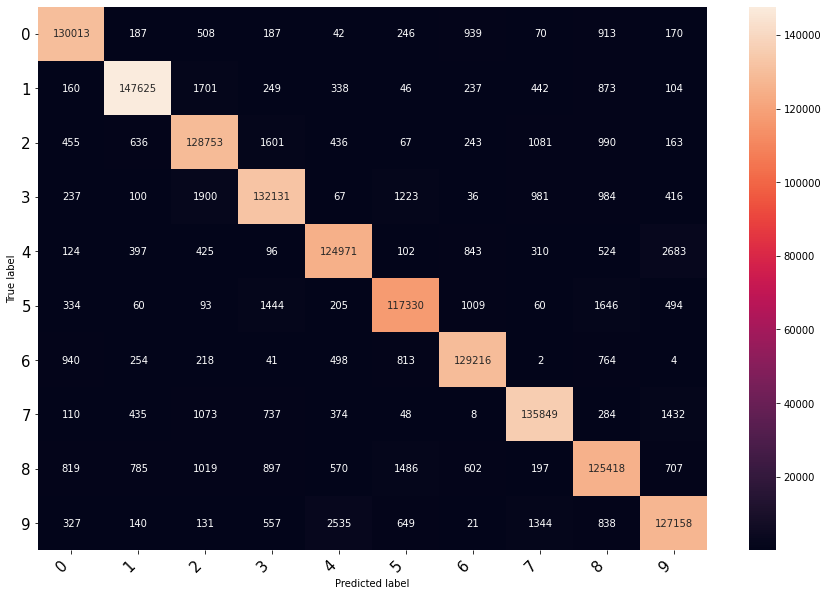

Learning Finished!
 averaged cost =  0.1391763961315155  train accuracy =  94.20503960167271


In [182]:
#Training Optimizer2
print('Training Optimizer2 the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 25
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer2.zero_grad() 
        
        hypothesis = model2(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        #predlist=torch.cat([predlist,preds.view(-1).cpu()])
        #lbllist=torch.cat([lbllist,Y.view(-1).cpu()])
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer2.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch
    model2.eval()    
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model2(X)
        #costv = criterion(hypothesis, Y)     
        #costv.backward()
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                #print(prediction)
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        #acc.append(accuracy)
        avgv+=cost.data/total_batch
    
    scheduler2.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))
    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


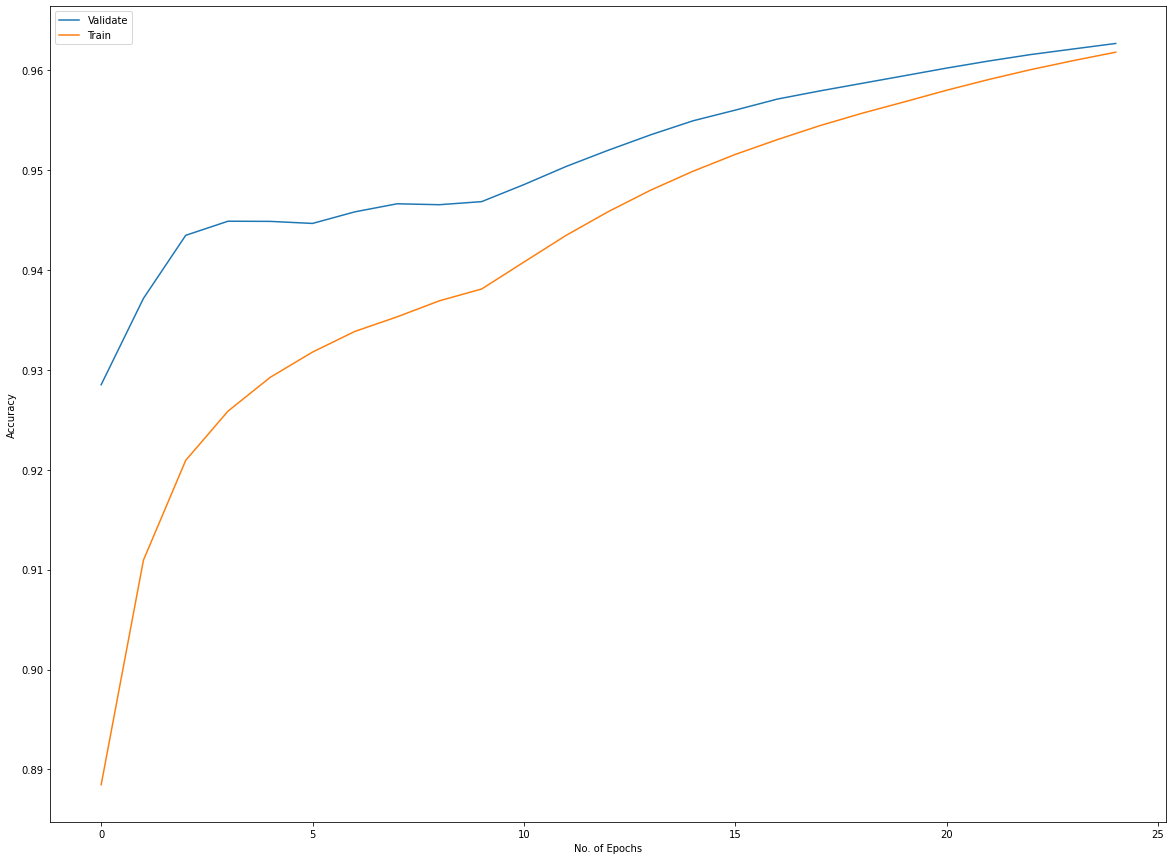

In [183]:
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Curves


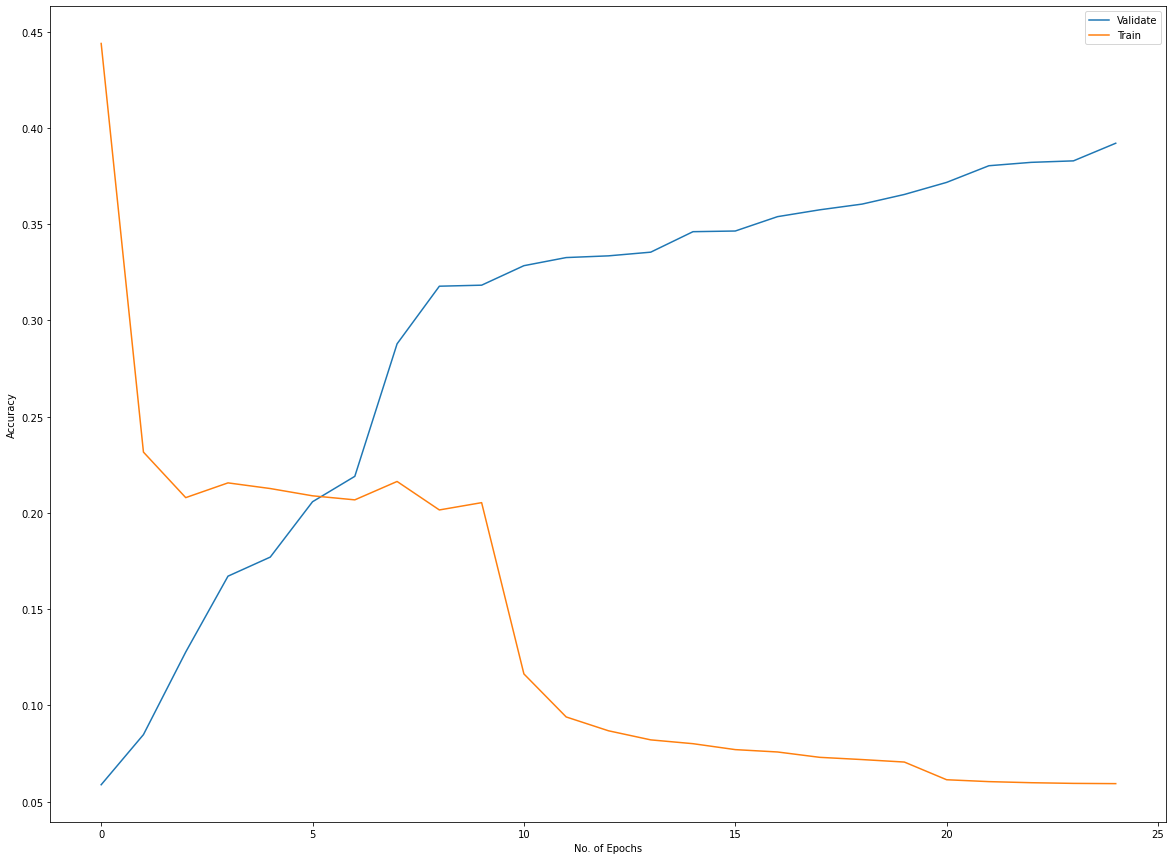

In [184]:
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training Optimizer3 the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 25
Epoch=  1 , batch =  0 , cost =  3.1023104190826416 , accuracy =  0.15625
Epoch=  1 , batch =  625 , cost =  0.1399659514427185 , accuracy =  0.9375
Epoch=  1 , batch =  1250 , cost =  0.1912604123353958 , accuracy =  0.90625
Validate Epoch=  1 , batch =  0 , cost =  0.10423925518989563 , accuracy =  0.96875
Epoch:  1  averaged cost =  0.3819243907928467  train accuracy =  0.8829976303317536


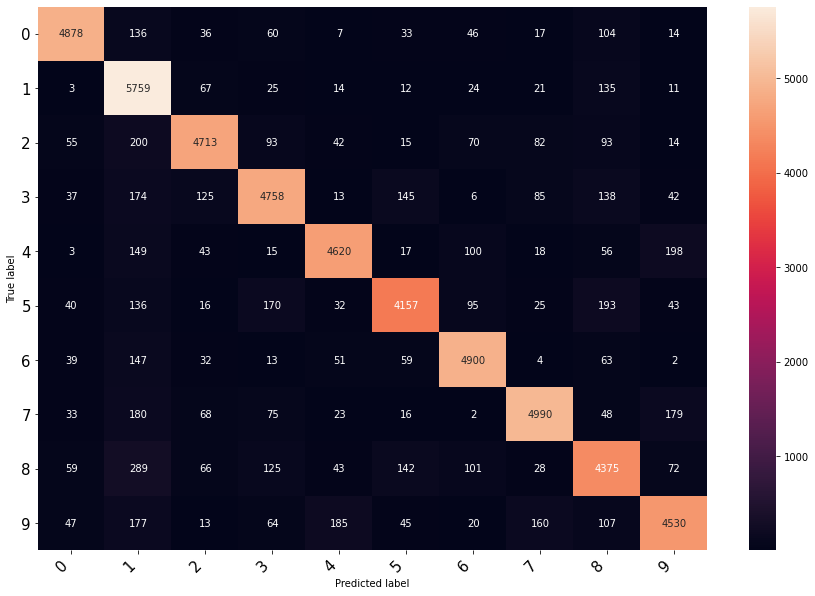

Epoch=  2 , batch =  0 , cost =  0.12884730100631714 , accuracy =  0.96875
Epoch=  2 , batch =  625 , cost =  0.312049001455307 , accuracy =  0.875
Epoch=  2 , batch =  1250 , cost =  0.13417595624923706 , accuracy =  0.9375
Validate Epoch=  2 , batch =  0 , cost =  0.0028032343834638596 , accuracy =  0.9375
Epoch:  2  averaged cost =  0.12215593457221985  train accuracy =  0.9226062648104265


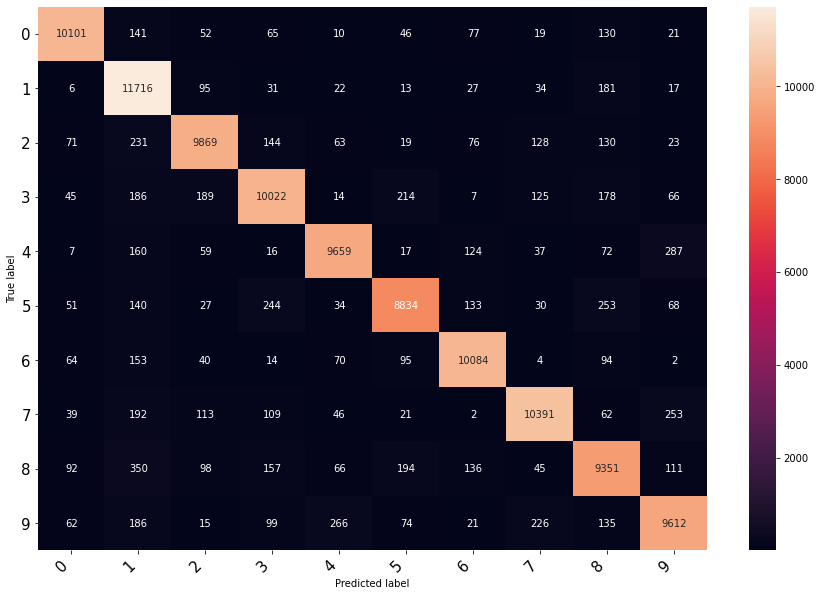

Epoch=  3 , batch =  0 , cost =  0.0623016357421875 , accuracy =  0.96875
Epoch=  3 , batch =  625 , cost =  0.16052530705928802 , accuracy =  0.9375
Epoch=  3 , batch =  1250 , cost =  0.0687364861369133 , accuracy =  1.0
Validate Epoch=  3 , batch =  0 , cost =  0.008314714767038822 , accuracy =  1.0
Epoch:  3  averaged cost =  0.10047045350074768  train accuracy =  0.9380677330173776


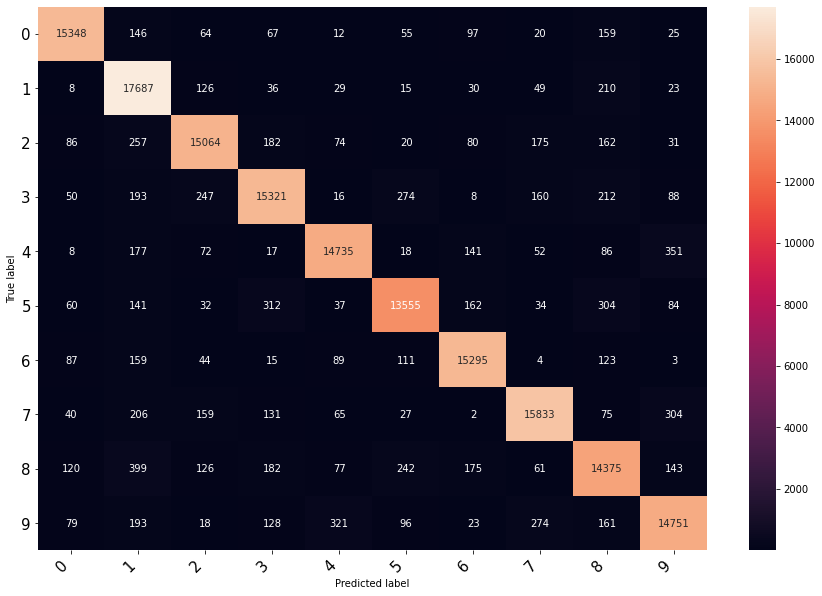

Epoch=  4 , batch =  0 , cost =  0.06502671539783478 , accuracy =  0.9375
Epoch=  4 , batch =  625 , cost =  0.09139589220285416 , accuracy =  0.96875
Epoch=  4 , batch =  1250 , cost =  0.013373319059610367 , accuracy =  1.0
Validate Epoch=  4 , batch =  0 , cost =  0.0368584506213665 , accuracy =  1.0
Epoch:  4  averaged cost =  0.0878901407122612  train accuracy =  0.9468027991706162


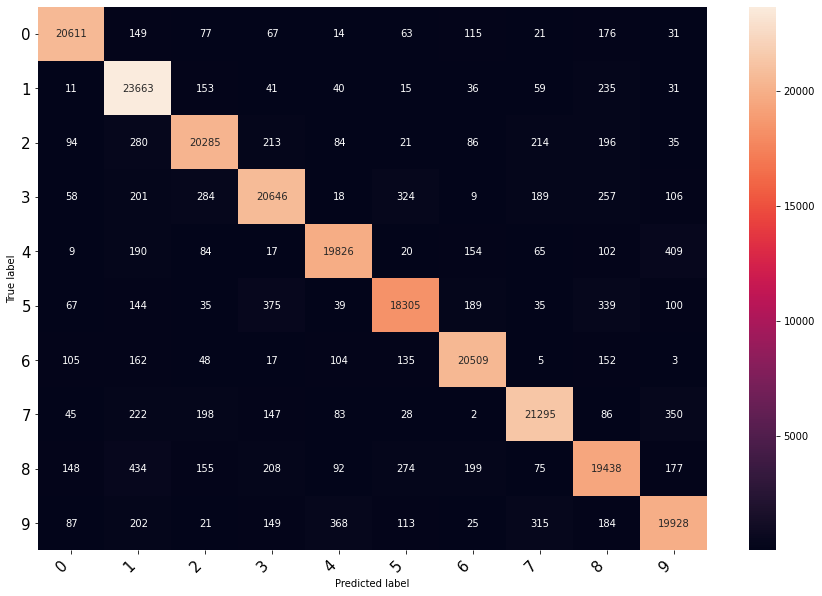

Epoch=  5 , batch =  0 , cost =  0.13564972579479218 , accuracy =  0.9375
Epoch=  5 , batch =  625 , cost =  0.1735774576663971 , accuracy =  0.96875
Epoch=  5 , batch =  1250 , cost =  0.13497276604175568 , accuracy =  0.96875
Validate Epoch=  5 , batch =  0 , cost =  0.016580022871494293 , accuracy =  0.96875
Epoch:  5  averaged cost =  0.08078552782535553  train accuracy =  0.9525473933649289


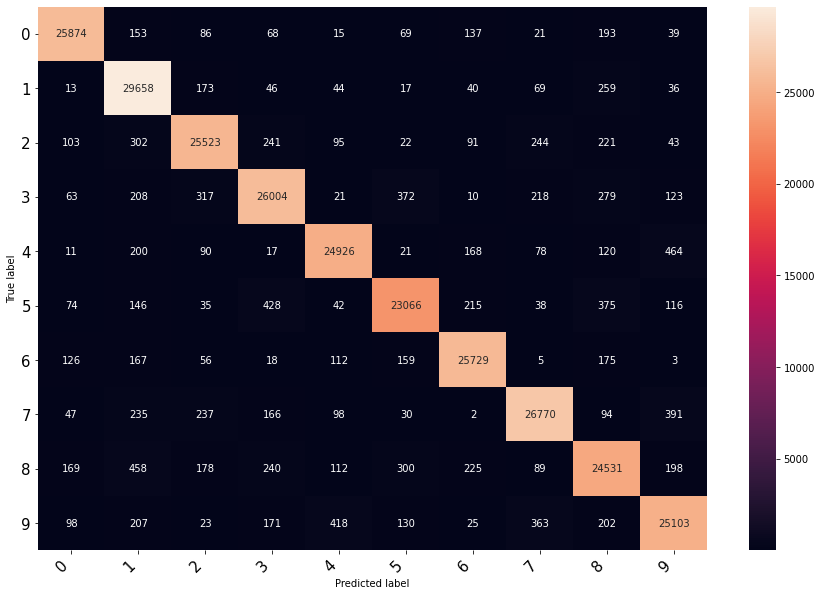

Epoch=  6 , batch =  0 , cost =  0.010582293383777142 , accuracy =  1.0
Epoch=  6 , batch =  625 , cost =  0.01756010390818119 , accuracy =  1.0
Epoch=  6 , batch =  1250 , cost =  0.02521861344575882 , accuracy =  1.0
Validate Epoch=  6 , batch =  0 , cost =  0.0011043151607736945 , accuracy =  0.96875
Epoch:  6  averaged cost =  0.0748584195971489  train accuracy =  0.9565375691153238


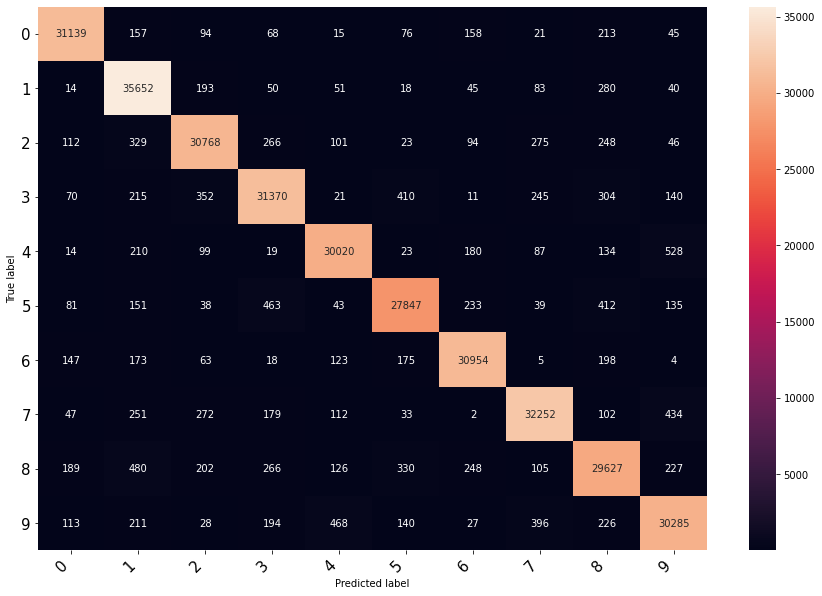

Epoch=  7 , batch =  0 , cost =  0.00967699009925127 , accuracy =  1.0
Epoch=  7 , batch =  625 , cost =  0.07991684228181839 , accuracy =  0.9375
Epoch=  7 , batch =  1250 , cost =  0.007998122833669186 , accuracy =  1.0
Validate Epoch=  7 , batch =  0 , cost =  0.003186423797160387 , accuracy =  1.0
Epoch:  7  averaged cost =  0.07109379768371582  train accuracy =  0.959689192620176


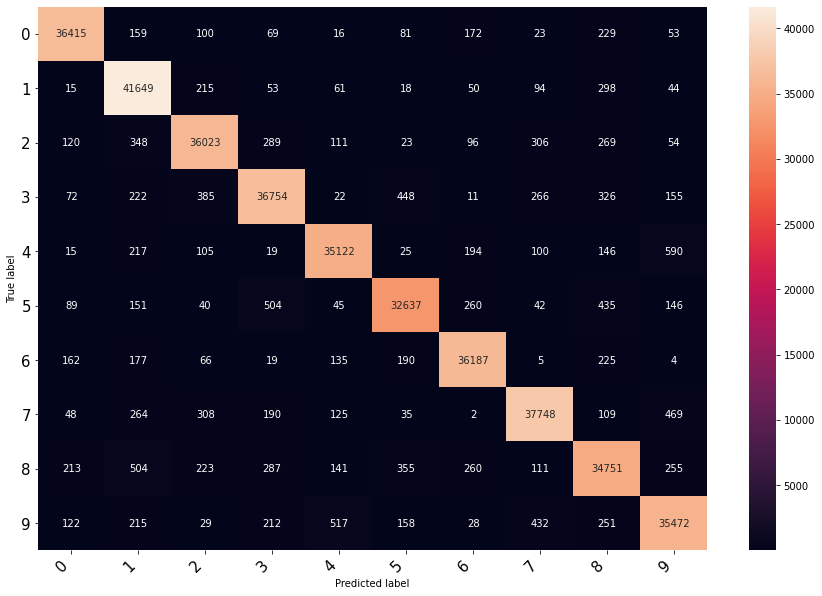

Epoch=  8 , batch =  0 , cost =  0.0036750270519405603 , accuracy =  1.0
Epoch=  8 , batch =  625 , cost =  0.014918007887899876 , accuracy =  1.0
Epoch=  8 , batch =  1250 , cost =  0.22159510850906372 , accuracy =  0.96875
Validate Epoch=  8 , batch =  0 , cost =  0.03831854835152626 , accuracy =  0.96875
Epoch:  8  averaged cost =  0.07168137282133102  train accuracy =  0.9620043135367299


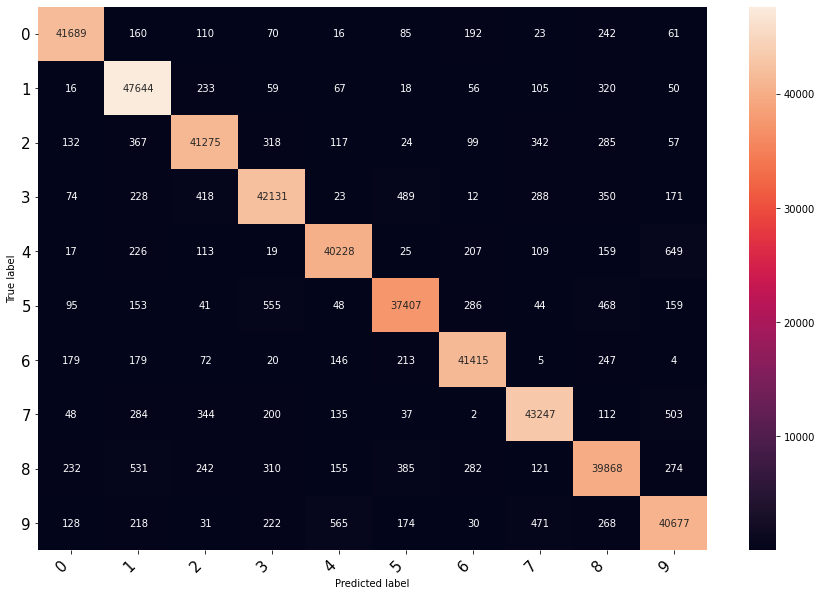

Epoch=  9 , batch =  0 , cost =  0.06982497125864029 , accuracy =  0.96875
Epoch=  9 , batch =  625 , cost =  0.05453174561262131 , accuracy =  0.96875
Epoch=  9 , batch =  1250 , cost =  0.01976023055613041 , accuracy =  1.0
Validate Epoch=  9 , batch =  0 , cost =  0.48834681510925293 , accuracy =  0.9375
Epoch:  9  averaged cost =  0.06893258541822433  train accuracy =  0.9638378751974723


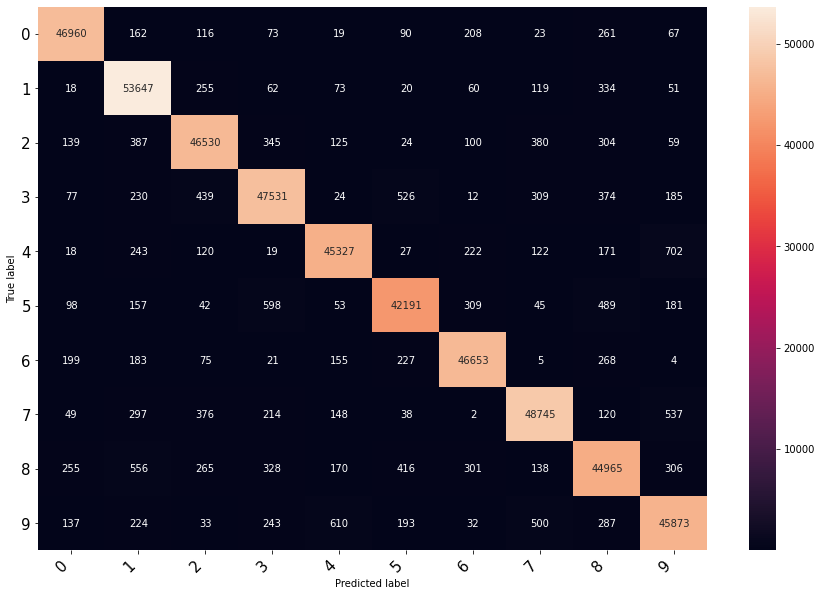

Epoch=  10 , batch =  0 , cost =  0.01579274982213974 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.005083102732896805 , accuracy =  1.0
Epoch=  10 , batch =  1250 , cost =  0.04476100206375122 , accuracy =  0.96875
Validate Epoch=  10 , batch =  0 , cost =  0.18556331098079681 , accuracy =  0.96875
Epoch:  10  averaged cost =  0.06478188931941986  train accuracy =  0.9654306131516588


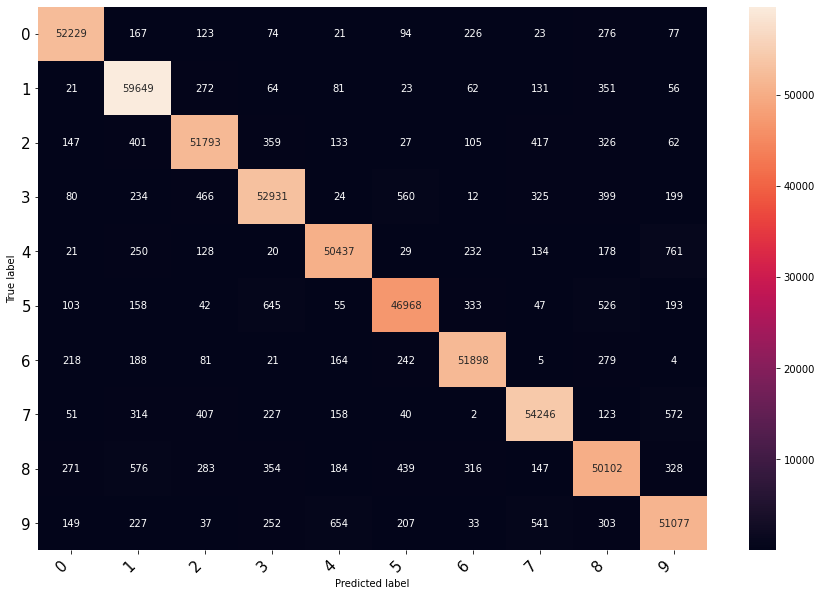

Epoch=  11 , batch =  0 , cost =  0.007092335727065802 , accuracy =  1.0
Epoch=  11 , batch =  625 , cost =  0.0012668875278905034 , accuracy =  1.0
Epoch=  11 , batch =  1250 , cost =  0.011923357844352722 , accuracy =  1.0
Validate Epoch=  11 , batch =  0 , cost =  0.012572922743856907 , accuracy =  1.0
Epoch:  11  averaged cost =  0.030663320794701576  train accuracy =  0.9677115871391642


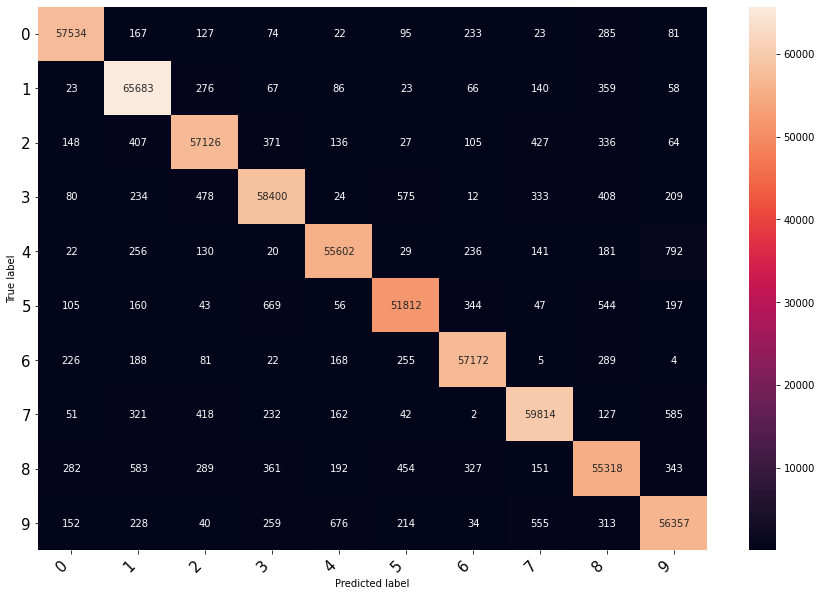

Epoch=  12 , batch =  0 , cost =  0.008285017684102058 , accuracy =  1.0
Epoch=  12 , batch =  625 , cost =  0.0010905765229836106 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  0.0037844849284738302 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  0.00042377953650429845 , accuracy =  1.0
Epoch:  12  averaged cost =  0.02655741386115551  train accuracy =  0.9697234769944708


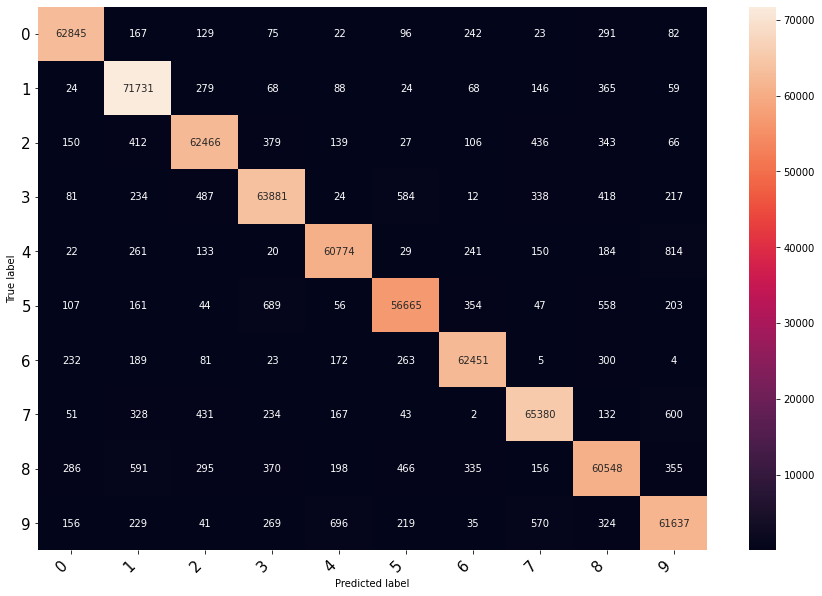

Epoch=  13 , batch =  0 , cost =  0.14031779766082764 , accuracy =  0.9375
Epoch=  13 , batch =  625 , cost =  0.08337961882352829 , accuracy =  0.96875
Epoch=  13 , batch =  1250 , cost =  0.0050503830425441265 , accuracy =  1.0
Validate Epoch=  13 , batch =  0 , cost =  0.00033995683770626783 , accuracy =  0.96875
Epoch:  13  averaged cost =  0.024847809225320816  train accuracy =  0.971462871399927


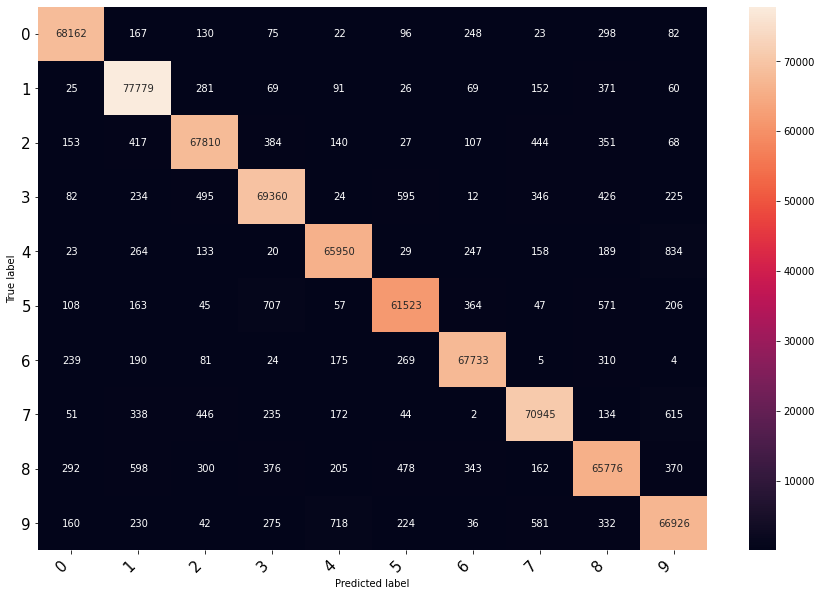

Epoch=  14 , batch =  0 , cost =  0.0035193574149161577 , accuracy =  1.0
Epoch=  14 , batch =  625 , cost =  0.0018441521096974611 , accuracy =  1.0
Epoch=  14 , batch =  1250 , cost =  0.036199603229761124 , accuracy =  0.96875
Validate Epoch=  14 , batch =  0 , cost =  0.001012385473586619 , accuracy =  0.96875
Epoch:  14  averaged cost =  0.023682767525315285  train accuracy =  0.9729802280805687


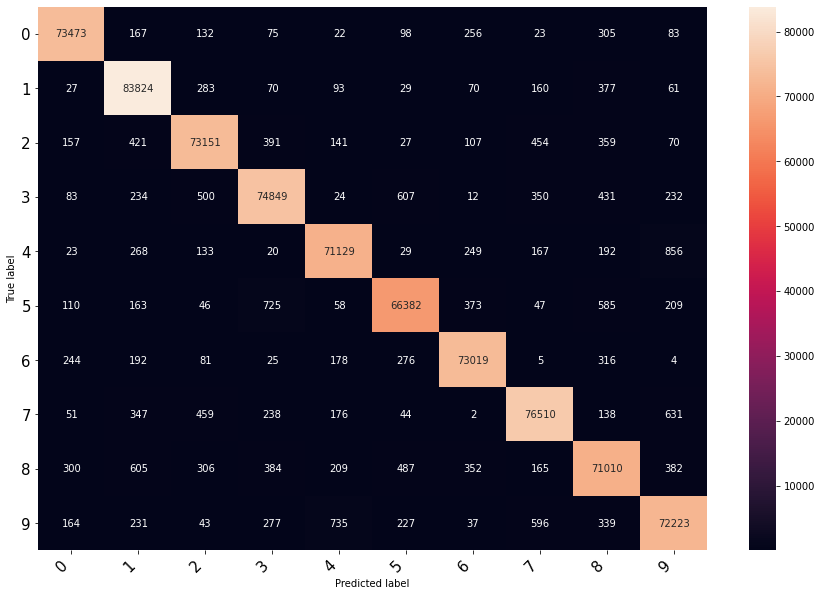

Epoch=  15 , batch =  0 , cost =  0.0004408119129948318 , accuracy =  1.0
Epoch=  15 , batch =  625 , cost =  0.004441549070179462 , accuracy =  1.0
Epoch=  15 , batch =  1250 , cost =  0.025461813434958458 , accuracy =  0.96875
Validate Epoch=  15 , batch =  0 , cost =  0.039151474833488464 , accuracy =  1.0
Epoch:  15  averaged cost =  0.02264910377562046  train accuracy =  0.9743310624012638


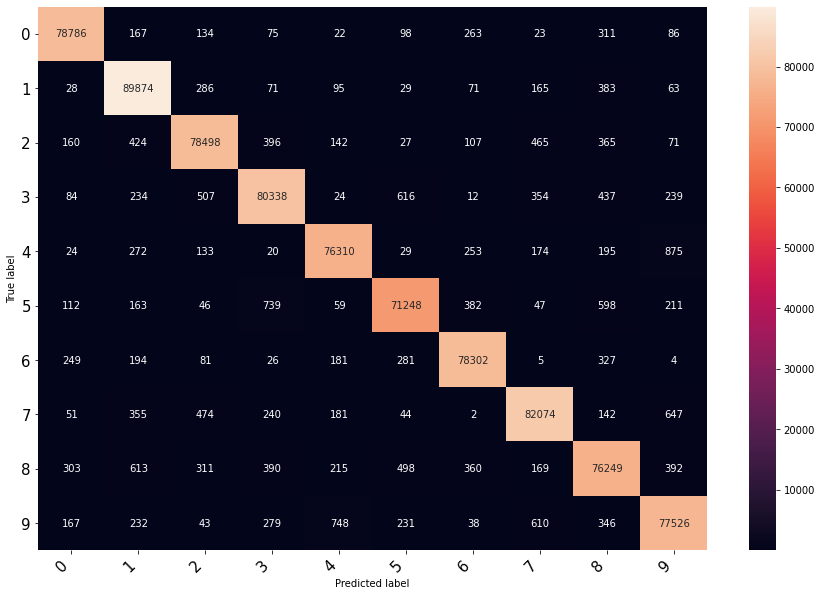

Epoch=  16 , batch =  0 , cost =  0.0010956578189507127 , accuracy =  1.0
Epoch=  16 , batch =  625 , cost =  0.0073588090017437935 , accuracy =  1.0
Epoch=  16 , batch =  1250 , cost =  0.09201721847057343 , accuracy =  0.96875
Validate Epoch=  16 , batch =  0 , cost =  0.06362491846084595 , accuracy =  1.0
Epoch:  16  averaged cost =  0.021659499034285545  train accuracy =  0.9755118853672986


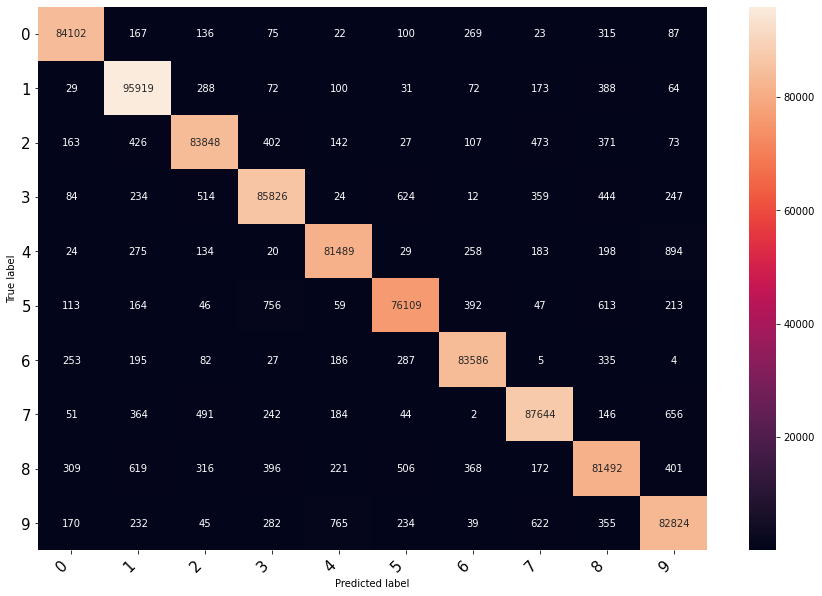

Epoch=  17 , batch =  0 , cost =  0.008506662212312222 , accuracy =  1.0
Epoch=  17 , batch =  625 , cost =  0.012918559834361076 , accuracy =  1.0
Epoch=  17 , batch =  1250 , cost =  0.023804640397429466 , accuracy =  0.96875
Validate Epoch=  17 , batch =  0 , cost =  0.00013071954890619963 , accuracy =  1.0
Epoch:  17  averaged cost =  0.021172935143113136  train accuracy =  0.9765635890019515


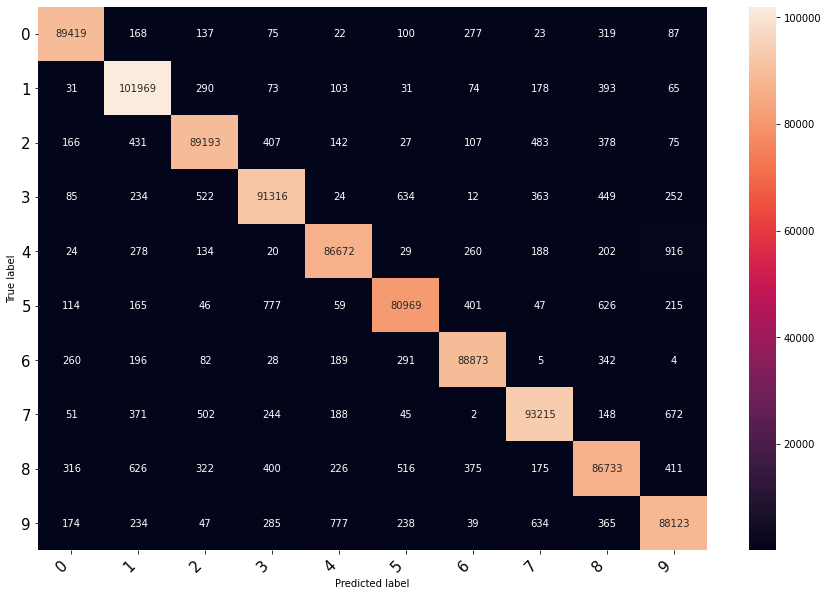

Epoch=  18 , batch =  0 , cost =  0.1689363420009613 , accuracy =  0.96875
Epoch=  18 , batch =  625 , cost =  0.0019498744513839483 , accuracy =  1.0
Epoch=  18 , batch =  1250 , cost =  0.0008876128122210503 , accuracy =  1.0
Validate Epoch=  18 , batch =  0 , cost =  8.247599907917902e-06 , accuracy =  1.0
Epoch:  18  averaged cost =  0.020371638238430023  train accuracy =  0.9775303202343338


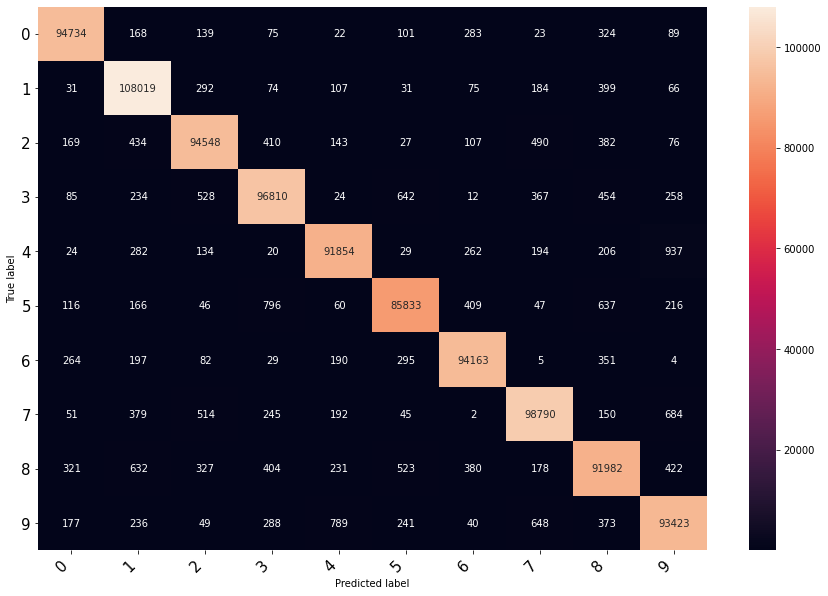

Epoch=  19 , batch =  0 , cost =  0.01701689511537552 , accuracy =  1.0
Epoch=  19 , batch =  625 , cost =  0.005401102360337973 , accuracy =  1.0
Epoch=  19 , batch =  1250 , cost =  0.00021769970771856606 , accuracy =  1.0
Validate Epoch=  19 , batch =  0 , cost =  0.0006439735880121589 , accuracy =  1.0
Epoch:  19  averaged cost =  0.019628074020147324  train accuracy =  0.9784060083561985


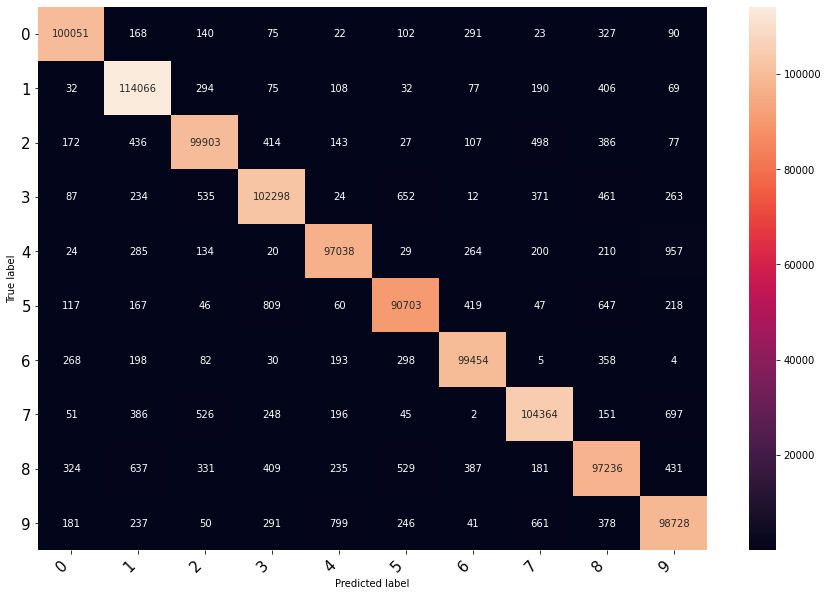

Epoch=  20 , batch =  0 , cost =  0.0006982485065236688 , accuracy =  1.0
Epoch=  20 , batch =  625 , cost =  0.028658432886004448 , accuracy =  0.96875
Epoch=  20 , batch =  1250 , cost =  0.0020324860233813524 , accuracy =  1.0
Validate Epoch=  20 , batch =  0 , cost =  0.0006141809280961752 , accuracy =  1.0
Epoch:  20  averaged cost =  0.018920298665761948  train accuracy =  0.9791996815758294


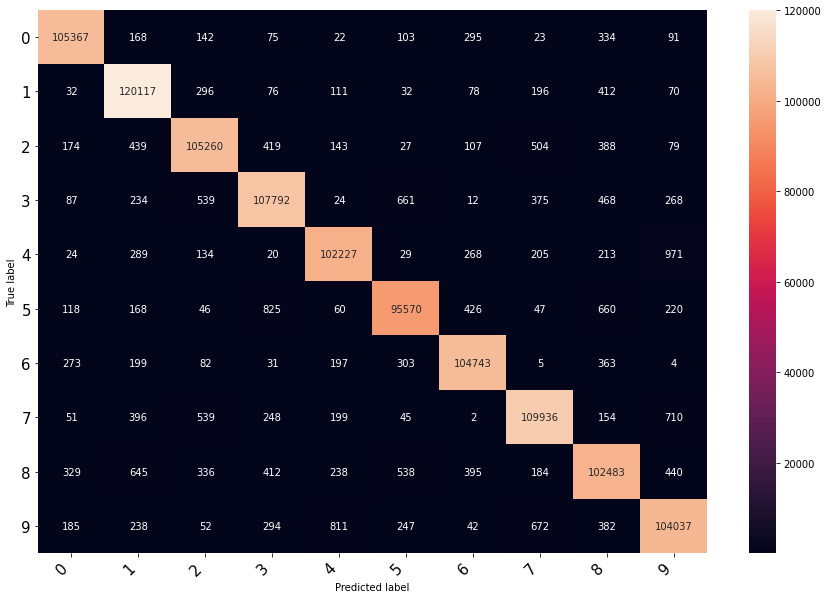

Epoch=  21 , batch =  0 , cost =  0.003544722916558385 , accuracy =  1.0
Epoch=  21 , batch =  625 , cost =  0.0044428822584450245 , accuracy =  1.0
Epoch=  21 , batch =  1250 , cost =  0.0016736590769141912 , accuracy =  1.0
Validate Epoch=  21 , batch =  0 , cost =  5.041808617534116e-05 , accuracy =  1.0
Epoch:  21  averaged cost =  0.01662144809961319  train accuracy =  0.9799565560821485


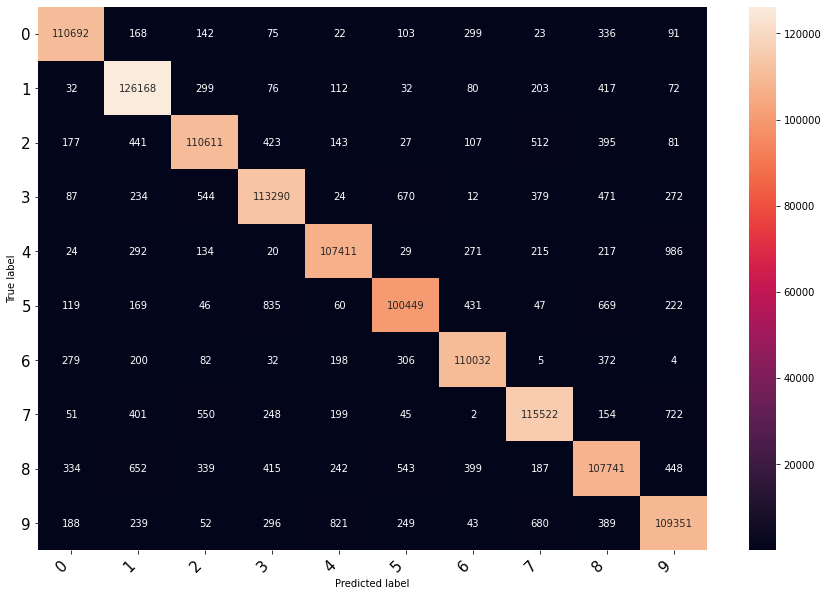

Epoch=  22 , batch =  0 , cost =  0.03164928779006004 , accuracy =  0.96875
Epoch=  22 , batch =  625 , cost =  0.012690892443060875 , accuracy =  1.0
Epoch=  22 , batch =  1250 , cost =  0.008199047297239304 , accuracy =  1.0
Validate Epoch=  22 , batch =  0 , cost =  0.001102333888411522 , accuracy =  1.0
Epoch:  22  averaged cost =  0.01623445190489292  train accuracy =  0.9806513558272296


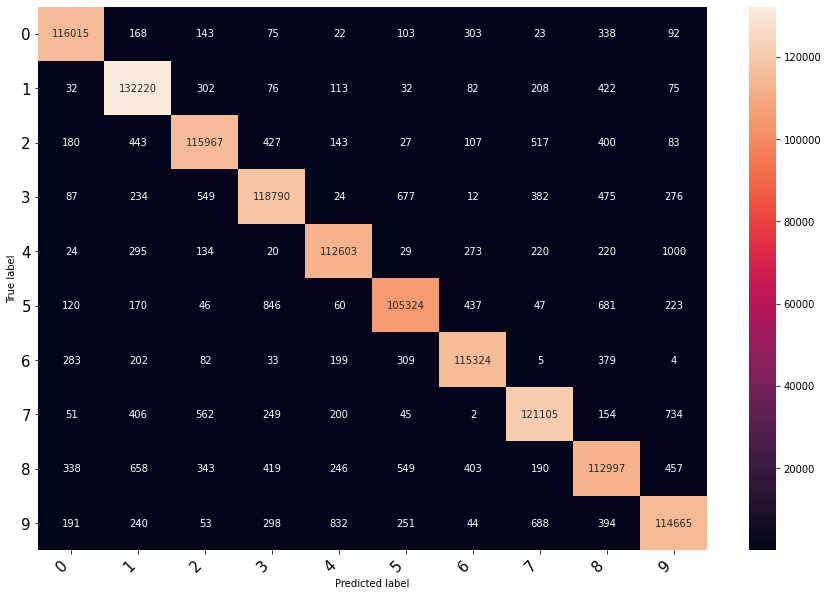

Epoch=  23 , batch =  0 , cost =  0.001429596683010459 , accuracy =  1.0
Epoch=  23 , batch =  625 , cost =  0.022103212773799896 , accuracy =  1.0
Epoch=  23 , batch =  1250 , cost =  0.0011077208910137415 , accuracy =  1.0
Validate Epoch=  23 , batch =  0 , cost =  0.00010174293856834993 , accuracy =  1.0
Epoch:  23  averaged cost =  0.016113976016640663  train accuracy =  0.9812921775190604


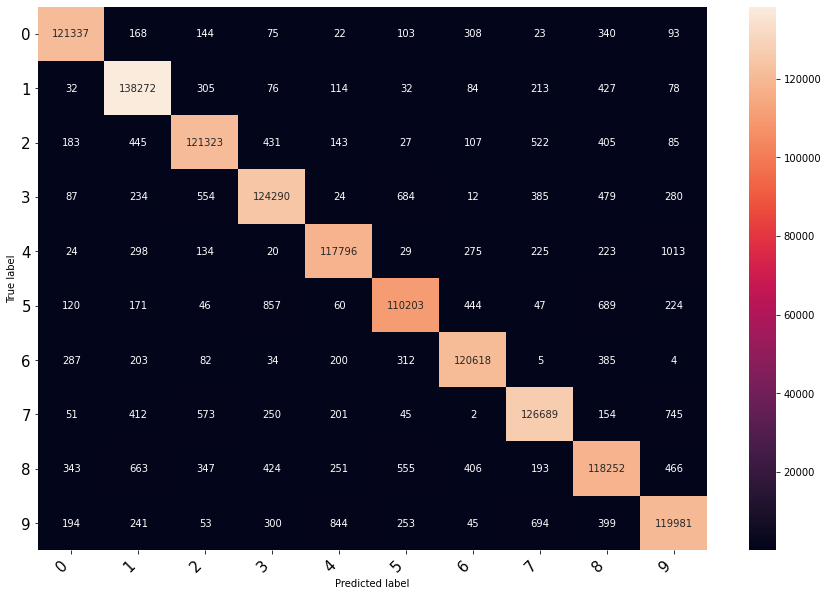

Epoch=  24 , batch =  0 , cost =  0.0007920382777228951 , accuracy =  1.0
Epoch=  24 , batch =  625 , cost =  0.07515868544578552 , accuracy =  0.96875
Epoch=  24 , batch =  1250 , cost =  0.5123956203460693 , accuracy =  0.96875
Validate Epoch=  24 , batch =  0 , cost =  0.001644248841330409 , accuracy =  1.0
Epoch:  24  averaged cost =  0.015988687053322792  train accuracy =  0.9818741977685624


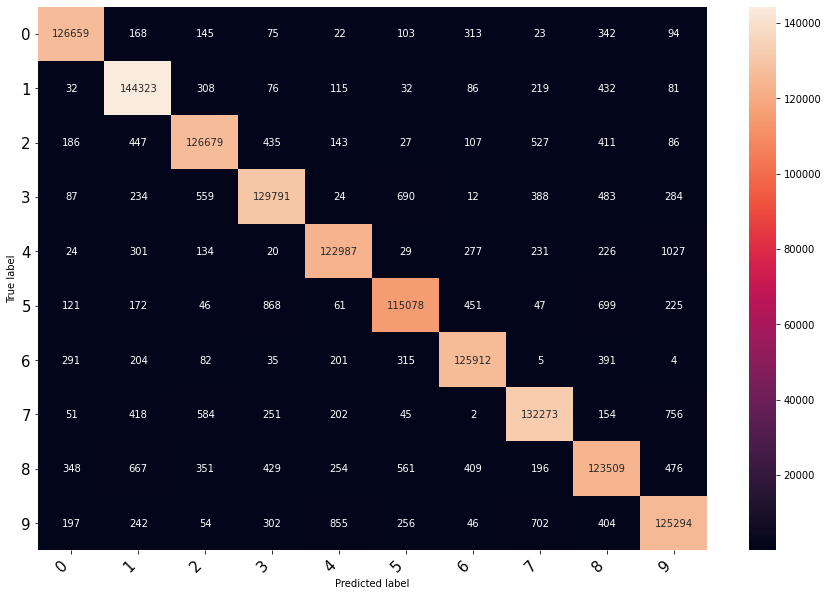

Epoch=  25 , batch =  0 , cost =  0.013447429984807968 , accuracy =  1.0
Epoch=  25 , batch =  625 , cost =  0.007442934438586235 , accuracy =  1.0
Epoch=  25 , batch =  1250 , cost =  0.002315979916602373 , accuracy =  1.0
Validate Epoch=  25 , batch =  0 , cost =  0.00932768639177084 , accuracy =  0.96875
Epoch:  25  averaged cost =  0.015881022438406944  train accuracy =  0.9824163210900474


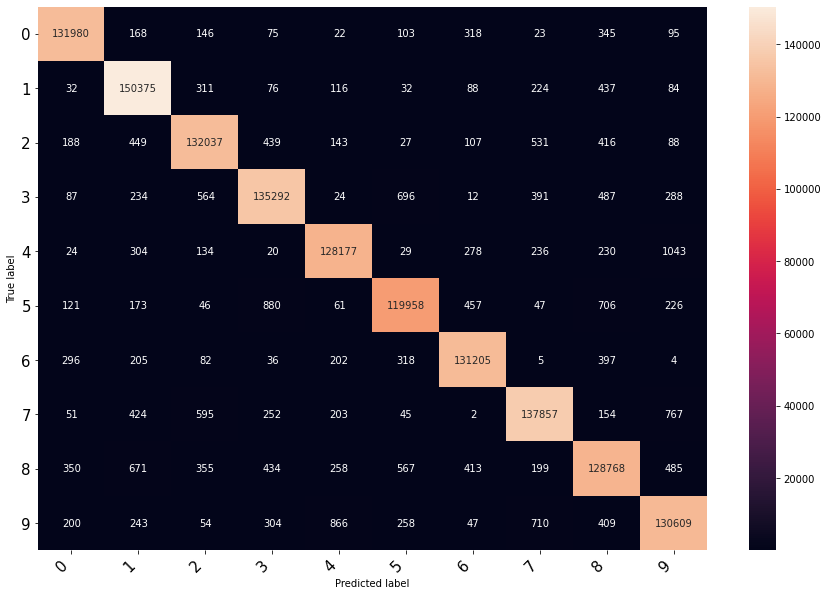

Learning Finished!
 averaged cost =  0.05742267832159996  train accuracy =  96.40053081261804


In [185]:
#Training Optimizer3
print('Training Optimizer3 the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 25
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer3.zero_grad() 
        
        hypothesis = model3(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        #predlist=torch.cat([predlist,preds.view(-1).cpu()])
        #lbllist=torch.cat([lbllist,Y.view(-1).cpu()])
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer3.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch
    model3.eval()    
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model3(X)
        #costv = criterion(hypothesis, Y)     
        #costv.backward()
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                #print(prediction)
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        #acc.append(accuracy)
        avgv+=cost.data/total_batch
    
    scheduler3.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))
    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


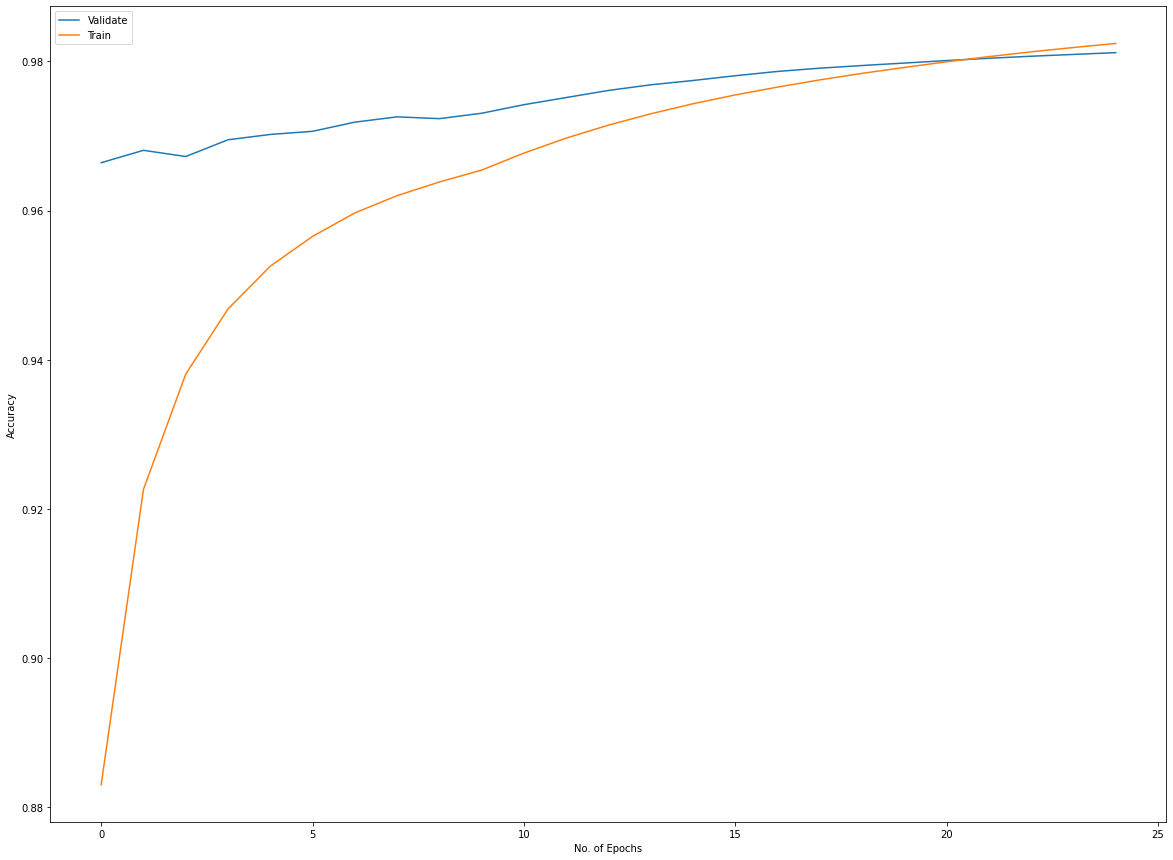

In [186]:
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Curves


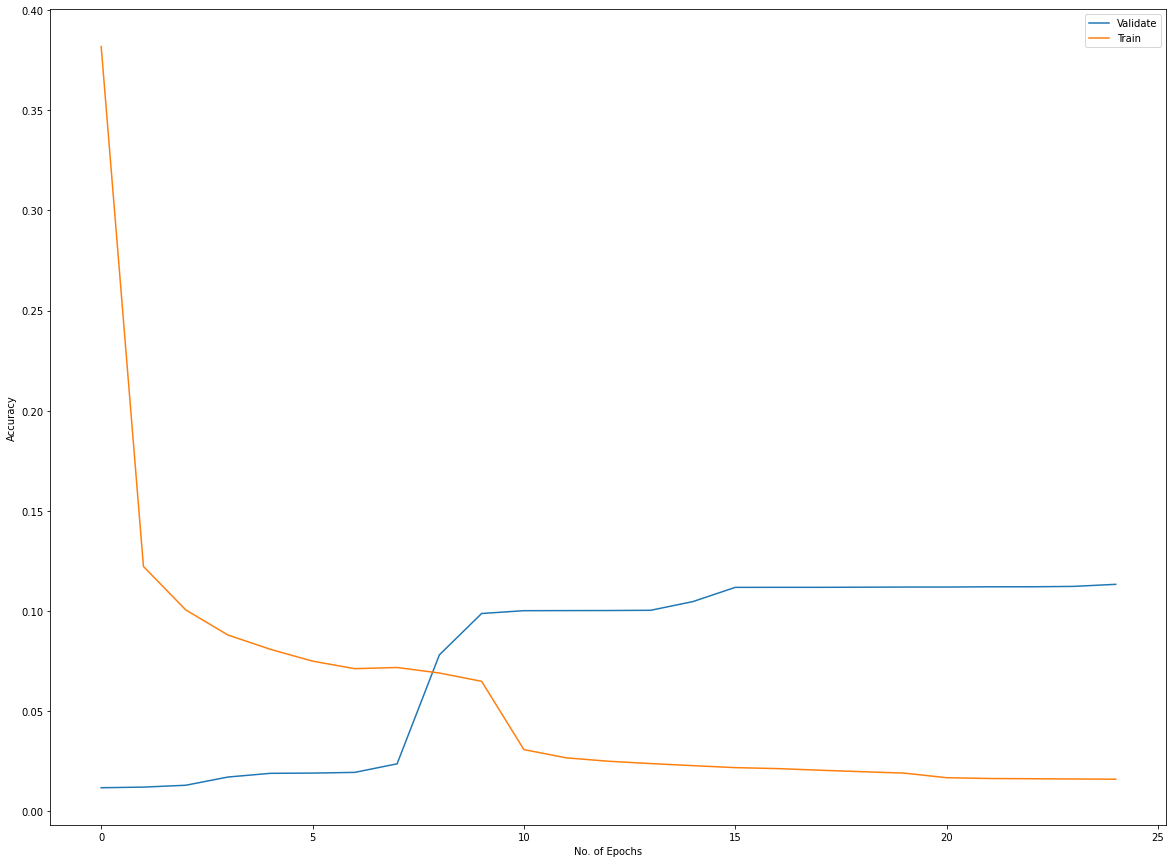

In [187]:
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [188]:
'''model.eval()

X_test = Variable(test.data.view(len(test), 1, 28, 28).float())
Y_test = Variable(test.targets)

prediction = model(X_test)

# Compute accuracy
print((torch.max(prediction.data, dim=1)[1]))
#print(len((torch.max(prediction.data, dim=1)[1]).tolist()))

correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y_test.data)
print("No. of Images Tested = ",len(test))
accuracy = correct_prediction.float().mean().item()
print('\nAccuracy: {:2.2f} %'.format(accuracy*100))'''

'model.eval()\n\nX_test = Variable(test.data.view(len(test), 1, 28, 28).float())\nY_test = Variable(test.targets)\n\nprediction = model(X_test)\n\n# Compute accuracy\nprint((torch.max(prediction.data, dim=1)[1]))\n#print(len((torch.max(prediction.data, dim=1)[1]).tolist()))\n\ncorrect_prediction = (torch.max(prediction.data, dim=1)[1] == Y_test.data)\nprint("No. of Images Tested = ",len(test))\naccuracy = correct_prediction.float().mean().item()\nprint(\'\nAccuracy: {:2.2f} %\'.format(accuracy*100))'

Testing Model1 the Deep Learning network ...


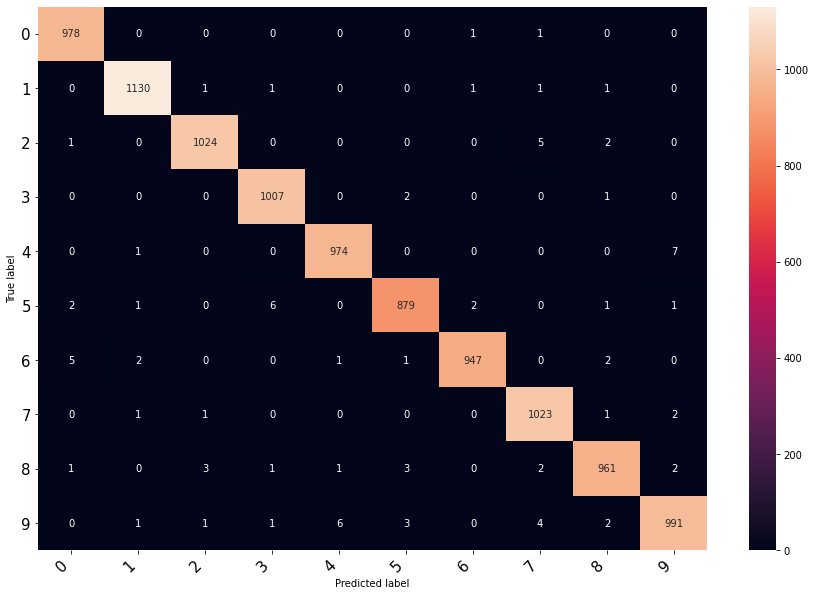

Accuracy is 99.14137380191693


In [189]:
print('Testing Model1 the Deep Learning network ...')
model1.eval()
accuracy=0
acc=[]
#predlist_test=torch.zeros(0,dtype=torch.long, device='cpu')
#lbllist_test=torch.zeros(0,dtype=torch.long, device='cpu')
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model1(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

Testing Model2 the Deep Learning network ...


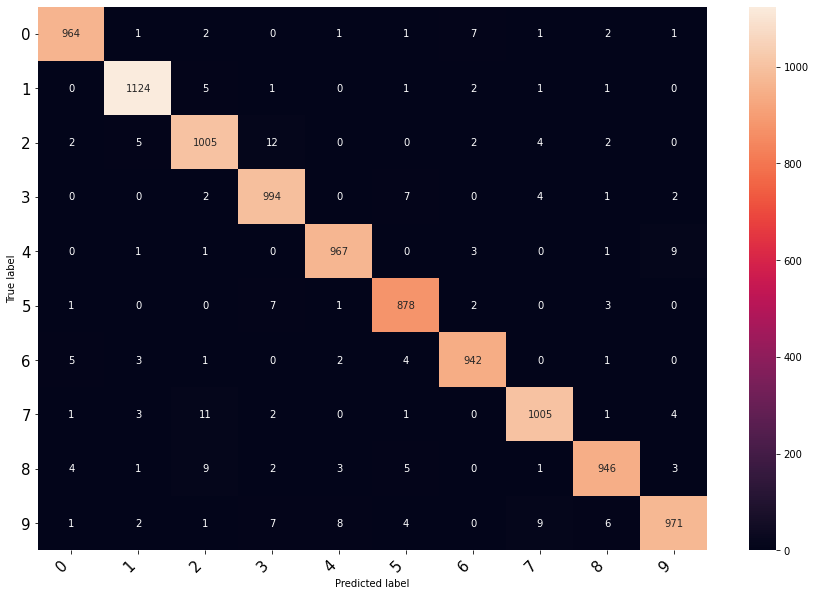

Accuracy is 97.9632587859425


In [190]:
print('Testing Model2 the Deep Learning network ...')
model2.eval()
accuracy=0
acc=[]
#predlist_test=torch.zeros(0,dtype=torch.long, device='cpu')
#lbllist_test=torch.zeros(0,dtype=torch.long, device='cpu')
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model2(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

Testing Model3 the Deep Learning network ...


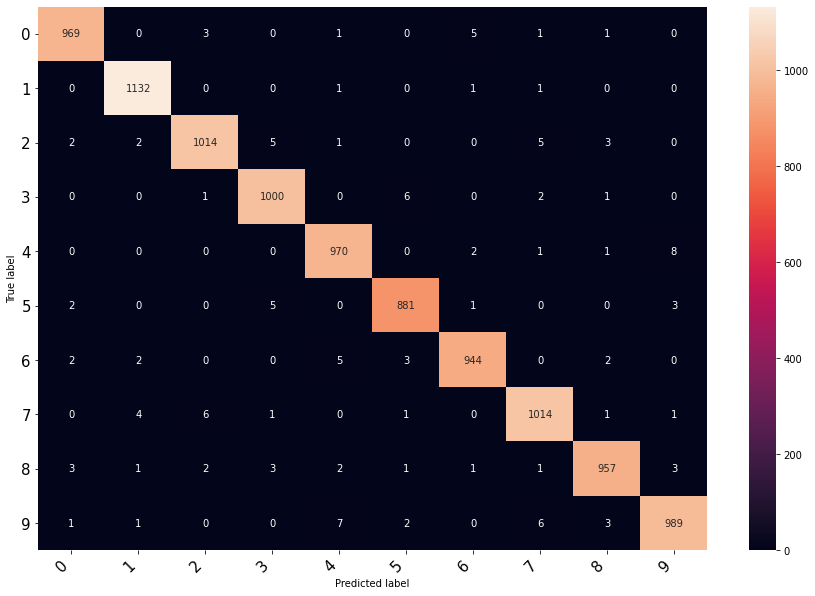

Accuracy is 98.7020766773163


In [191]:
print('Testing Model3 the Deep Learning network ...')
model3.eval()
accuracy=0
acc=[]
#predlist_test=torch.zeros(0,dtype=torch.long, device='cpu')
#lbllist_test=torch.zeros(0,dtype=torch.long, device='cpu')
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model3(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

REFERENCES:-

https://pytorch.org/docs/stable/optim.html


This Notebook is continuation of Baseline.ipynb.

In this Notebook we are applying 3 different optimisers, namely RMSprop, Adam, Nestorov Models.

The Accuracy for RMSprop is 99.15%(We used Learning Rate as 0.001 as for Learning Rate the Accuracy was nearly 50%)

The Accuracy for Adam is 97.96%

The Accuracy for Nestorov is 98.71%
